In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [49]:
data = pd.read_excel('Base de datos v1.xlsx')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [51]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [52]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Imputación nulos

In [53]:
data.dropna(subset=['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra'], inplace=True)

In [54]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       0.0
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            0.0
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      0.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Análisis Univariado

### Variables cuanti

In [55]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [56]:
numeric_cols = numeric_cols.drop(['ID_Cliente','Fuga'])

In [57]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral", showmeans=True)
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_

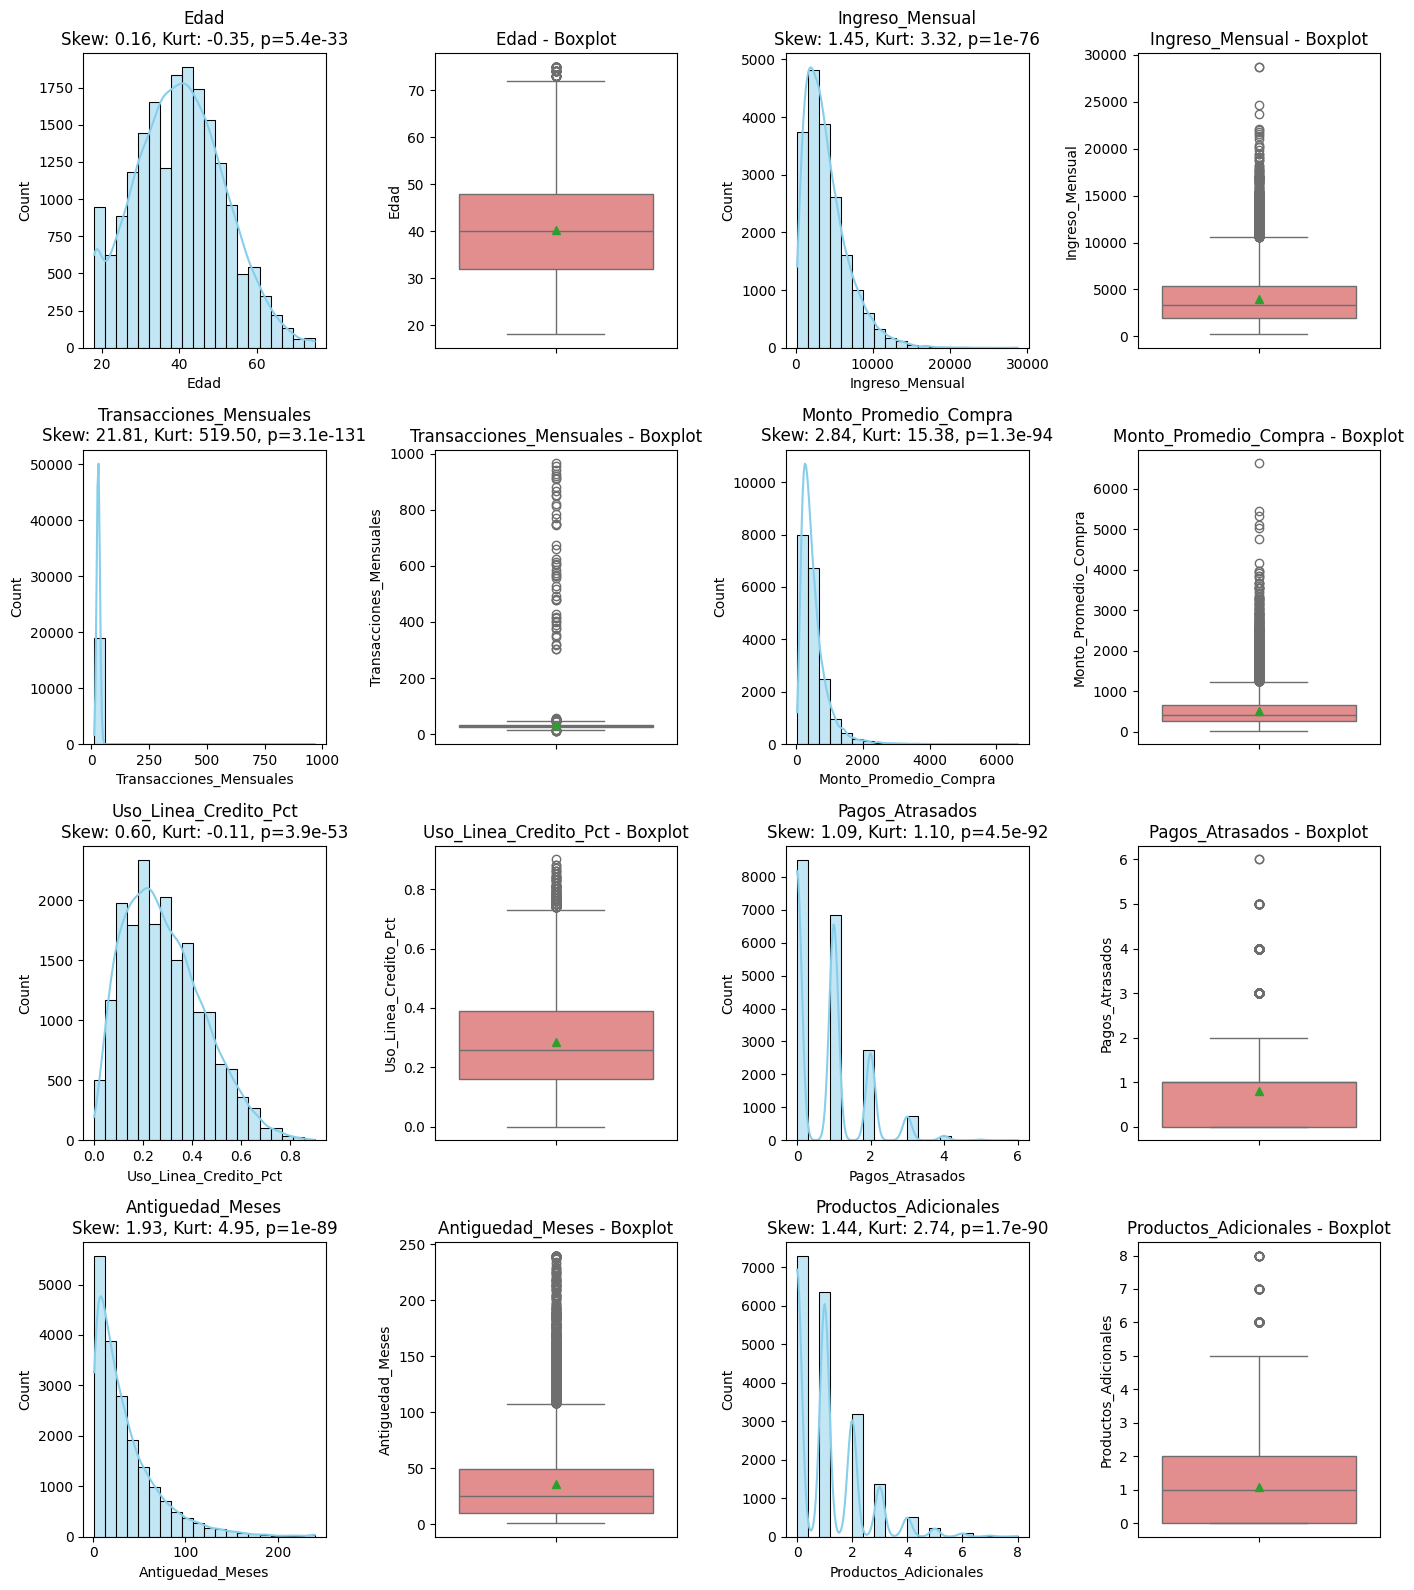

In [58]:
plot_numeric_distributions(data, numeric_cols)

Edad: distribución casi normal, sin valores extremos. La mayoría de clientes está entre 25 y 45 años.

Ingreso mensual: muy asimétrica a la derecha; pocos clientes con ingresos altos y muchos con ingresos bajos o medios.

Transacciones mensuales: extremadamente sesgada; la mayoría realiza pocas transacciones, con algunos casos atípicos muy altos.

Monto promedio de compra: también sesgada positivamente; muchos clientes compran por montos pequeños, pocos con montos muy grandes.

Uso de línea de crédito (%): ligera asimetría a la derecha; la mayoría utiliza menos del 50% de su línea.

Pagos atrasados: la mayoría tiene entre 0 y 1 atraso; pocos clientes con más atrasos (outliers).

Antigüedad (meses): la mayoría de clientes es reciente; pocos con larga antigüedad.

Productos adicionales: distribución discreta; la mayoría tiene 1 o ningún producto adicional.



## Variables cuali

In [59]:
categorical_cols = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'Fuga']
categorical_cols.append('Pagos_Atrasados')
categorical_cols.append('Productos_Adicionales')

In [60]:
def plot_categorical_distributions(data, categorical_cols):
    cols_per_row = 3
    n = len(categorical_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 6, rows * 4))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, idx)
        sns.countplot(data=data, x=col, hue=col, palette="Set2")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

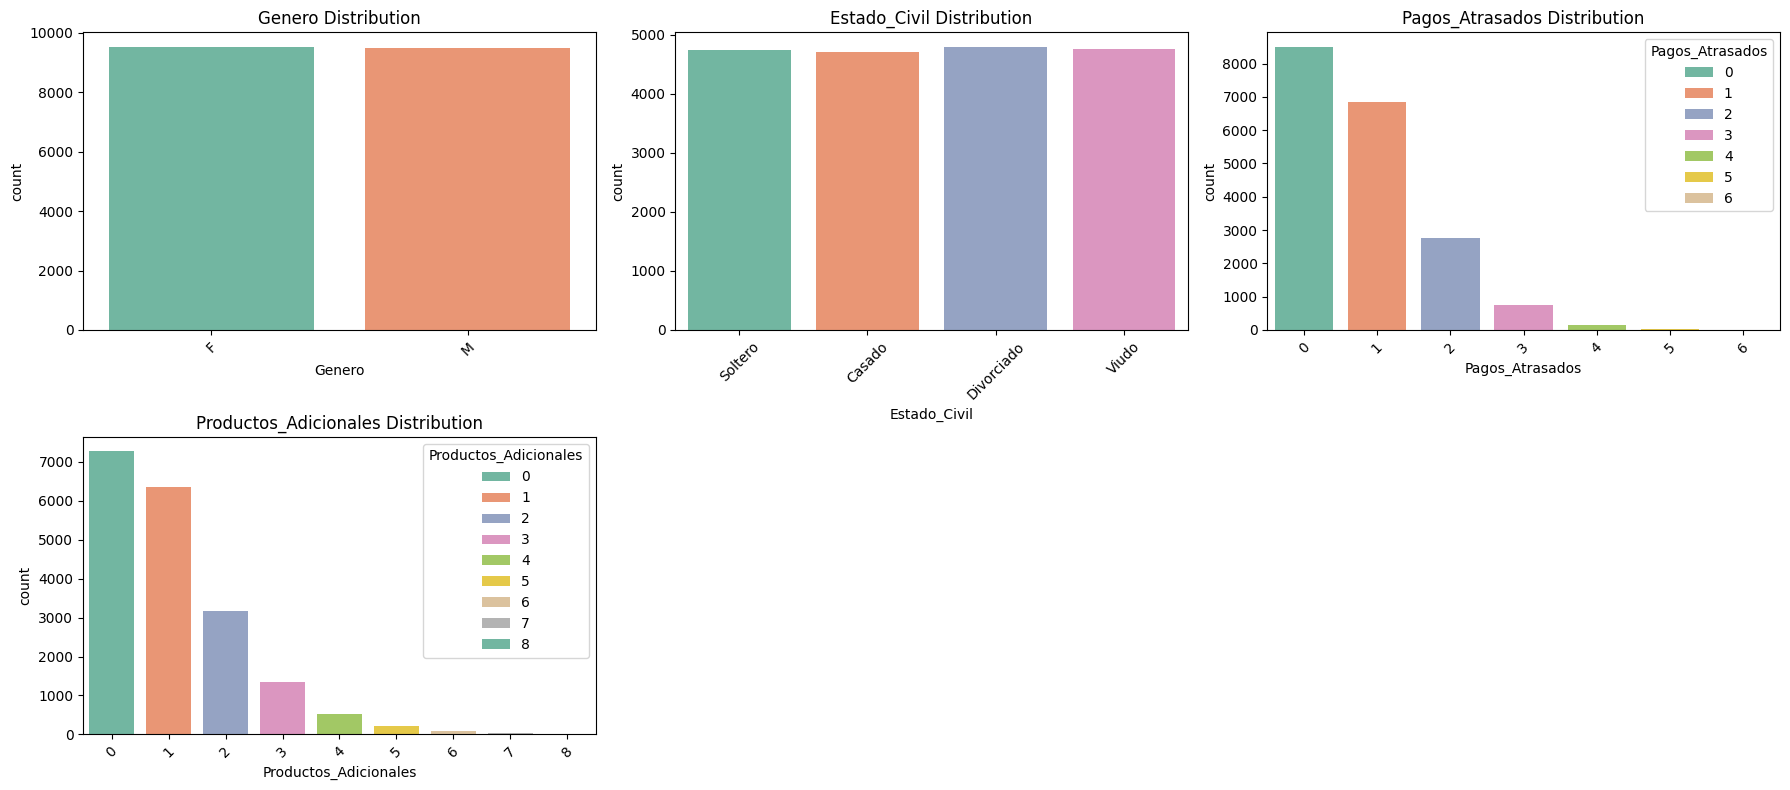

In [61]:
plot_categorical_distributions(data, categorical_cols)

Género: No hay sesgo por género; ambos grupos están representados de forma casi igual.

Estado_civil: No hay una categoría dominante; el estado civil no parece concentrarse en un solo grupo.

Pagos_Atrasados: Indica un buen comportamiento de pago en general; los atrasos múltiples son poco frecuentes.

Productos_Adicionales: Sugiere baja adopción de productos adicionales; posible área de oportunidad comercial.


## Distribución de variable objetivo

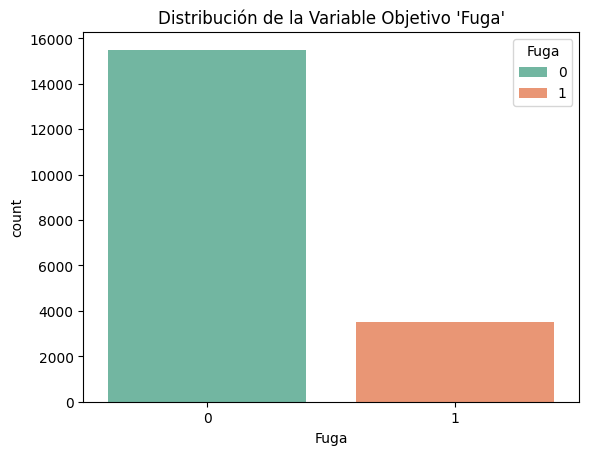

In [62]:
sns.countplot(data=data, x='Fuga', hue='Fuga', palette="Set2")
plt.title("Distribución de la Variable Objetivo 'Fuga'")
plt.show()

In [237]:
data['Fuga'].value_counts()/len(data) * 100

Fuga
0    81.509335
1    18.490665
Name: count, dtype: float64


Fuga (variable objetivo): El dataset está desbalanceado, lo cual puede requerir técnicas de balanceo para modelos predictivos.


# Análisis Multivariado

## Multivariado Cuantitativa vs Cuantiativa

In [63]:
numeric_cols = numeric_cols.drop(['Pagos_Atrasados', 'Productos_Adicionales'])

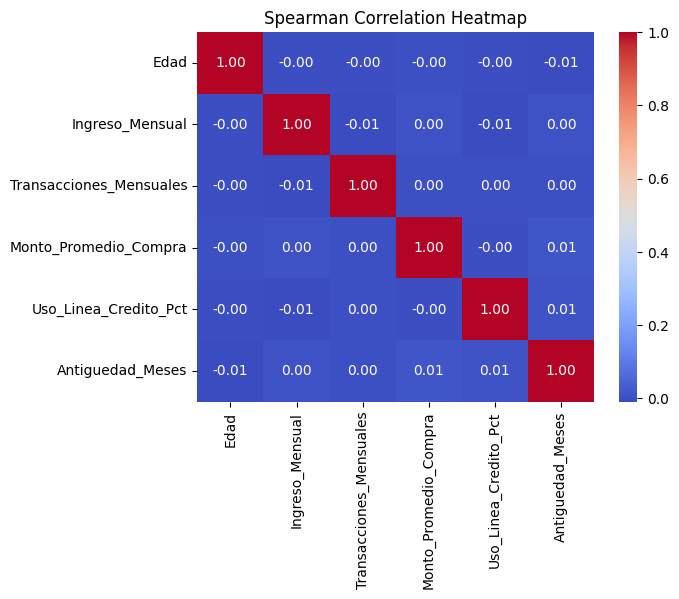

In [64]:
sns.heatmap(data[numeric_cols].corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

No existen correlaciones significativas entre las variables numéricas; todos los coeficientes están muy cercanos a 0.

Esto indica que las variables son independientes entre sí, sin relaciones lineales ni monótonas fuertes.

Osea, no hay multicolinealidad en el dataset, lo cual es positivo para hacer un modelado predictivo.

Cada variable podría aportar información distinta en el análisis de la fuga, sin redundancia entre ellas.

In [65]:
from scipy.stats import spearmanr
import numpy as np

def get_spearman_pvalues(df):
    """Calcula matriz de p-valores para correlaciones de Spearman
        args: df (DataFrame): DataFrame con variables numéricas
        return: DataFrame con matriz de p-valores
    """
    cols = df.columns
    n = len(cols)
    p_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                p_matrix[i, j] = 0  # Diagonal siempre 0
            else:
                # Eliminar NaN para el cálculo
                x = df.iloc[:, i].dropna()
                y = df.iloc[:, j].dropna()
                # Encontrar índices comunes (sin NaN en ambas variables)
                common_idx = df[[cols[i], cols[j]]].dropna().index
                if len(common_idx) > 2:
                    corr, p_val = spearmanr(df.loc[common_idx, cols[i]],
                                          df.loc[common_idx, cols[j]])
                    p_matrix[i, j] = p_val
                else:
                    p_matrix[i, j] = np.nan

    return pd.DataFrame(p_matrix, index=cols, columns=cols)

# Calcular matriz de p-valores
p_values_spearman = get_spearman_pvalues(data[numeric_cols])


def correlation_df(df, pval_matrix, method='spearman'):
    # Crear lista de pares únicos (sin repetir)
    corr_matrix = df.corr(method=method)
    pairs_data = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            var1, var2 = cols[i], cols[j]
            corr = corr_matrix.loc[var1, var2]
            p_val = pval_matrix.loc[var1, var2]

            # Clasificar fuerza de correlación
            abs_corr = abs(corr)
            if abs_corr < 0.1:
                fuerza = "Muy débil"
            elif abs_corr < 0.3:
                fuerza = "Débil"
            elif abs_corr < 0.5:
                fuerza = "Moderada"
            elif abs_corr < 0.7:
                fuerza = "Fuerte"
            else:
                fuerza = "Muy fuerte"

            pairs_data.append({
                'Par_Variables': f"{var1} ↔ {var2}",
                'Spearman_ρ': corr,
                'p-valor': p_val,
                'Significativo_α05': 'Sí' if p_val < 0.05 else 'No',
                'Fuerza': fuerza
            })

    # Crear DataFrame y ordenar por p-valor
    correlations_df = pd.DataFrame(pairs_data)
    correlations_df = correlations_df.sort_values('p-valor')

    # Redondear valores para mejor legibilidad
    correlations_df['Spearman_ρ'] = correlations_df['Spearman_ρ'].round(4)
    correlations_df['p-valor'] = correlations_df['p-valor'].round(6)

    display(correlations_df)


In [66]:
correlation_df(data[numeric_cols], p_values_spearman, method='spearman')

,Par_Variables,Spearman_ρ,p-valor,Significativo_α05,Fuerza
13,Monto_Promedio_Compra ↔ Antiguedad_Meses,0.0134,0.064139,No,Muy débil
7,Ingreso_Mensual ↔ Uso_Linea_Credito_Pct,-0.0089,0.221392,No,Muy débil
4,Edad ↔ Antiguedad_Meses,-0.0084,0.246440,No,Muy débil
14,Uso_Linea_Credito_Pct ↔ Antiguedad_Meses,0.0070,0.337607,No,Muy débil
5,Ingreso_Mensual ↔ Transacciones_Mensuales,-0.0055,0.444916,No,Muy débil
6,Ingreso_Mensual ↔ Monto_Promedio_Compra,0.0043,0.554932,No,Muy débil
8,Ingreso_Mensual ↔ Antiguedad_Meses,0.0038,0.597284,No,Muy débil
1,Edad ↔ Transacciones_Mensuales,-0.0038,0.597292,No,Muy débil
9,Transacciones_Mensuales ↔ Monto_Promedio_Compra,0.0029,0.687311,No,Muy débil
11,Transacciones_Mensuales ↔ Antiguedad_Meses,0.0026,0.717121,No,Muy débil


No existe multicolinealidad entre variables numéricas, las variables aportan información distinta.

Antigüedad parece ser el principal factor relacionado con el uso de productos adicionales, un posible indicador de fidelidad del cliente.

Las demás correlaciones son insignificantes o muy débiles, por lo que no se espera redundancia en el modelado.

## Multivariado Cualitativa vs Cualitativa

In [67]:
from scipy.stats import chi2_contingency
import numpy as np

def realizar_pruebas_chi2_churn(data, variables_categoricas, target='Fuga', alpha=0.05):
    """
    Realiza pruebas chi-cuadrado para variables categóricas vs Churn.
    Calcula V de Cramer como medida del tamaño del efecto.
    """
    resultados = []

    print("ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN")
    print("=" * 65)

    for variable in variables_categoricas:
        if variable == target:  # Skip the target variable itself
            continue

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(data[variable], data[target])

        # Realizar prueba chi-cuadrado
        chi2_stat, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        # Calcular V de Cramer (medida del tamaño del efecto)
        n = tabla_contingencia.sum().sum()
        v_cramer = np.sqrt(chi2_stat / (n * (min(tabla_contingencia.shape) - 1)))

        # Interpretar V de Cramer
        if v_cramer < 0.1:
            efecto = "Muy débil"
        elif v_cramer < 0.3:
            efecto = "Débil"
        elif v_cramer < 0.5:
            efecto = "Moderado"
        else:
            efecto = "Fuerte"

        # Determinar si es significativo
        es_significativo = p_value < alpha

        # Guardar resultados
        resultado = {
            'Variable': variable,
            'Chi2_Estadistico': chi2_stat,
            'p_valor': p_value,
            'Grados_Libertad': dof,
            'V_Cramer': v_cramer,
            'Tamaño_Efecto': efecto,
            'Es_Significativo': 'Sí' if es_significativo else 'No',
            'Interpretacion': 'Rechazar H0 (hay asociación)' if es_significativo else 'No rechazar H0 (no hay asociación)'
        }
        resultados.append(resultado)

        # Mostrar resultados detallados para variables significativas con efecto moderado o fuerte
        if es_significativo and v_cramer >= 0.2:
            print(f"\n Variable: {variable}")
            print(f"   Chi² = {chi2_stat:.4f}")
            print(f"   p-valor = {p_value:.6f}")
            print(f"   V de Cramer = {v_cramer:.4f} ({efecto})")
            print(f"   Resultado: {resultado['Interpretacion']}")
            print(f"   Tabla de Contingencia:")
            # Mostrar tabla con porcentajes
            tabla_pct = pd.crosstab(data[variable], data[target], normalize='index') * 100
            print(tabla_pct.round(1))
            print("-" * 50)

    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values('V_Cramer', ascending=False)

    return df_resultados

# Realizar las pruebas chi-cuadrado
resultados_chi2 = realizar_pruebas_chi2_churn(data, categorical_cols)

print("\n RESUMEN DE TODAS LAS VARIABLES:")
print("=" * 65)
display(resultados_chi2[['Variable', 'Chi2_Estadistico', 'p_valor', 'V_Cramer',
                        'Tamaño_Efecto', 'Es_Significativo']].round(4))

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 RESUMEN DE TODAS LAS VARIABLES:


,Variable,Chi2_Estadistico,p_valor,V_Cramer,Tamaño_Efecto,Es_Significativo
2,Pagos_Atrasados,43.2314,0.0000,0.0477,Muy débil,Sí
3,Productos_Adicionales,37.0905,0.0000,0.0442,Muy débil,Sí
1,Estado_Civil,4.1657,0.2441,0.0148,Muy débil,No
0,Genero,0.0259,0.8722,0.0012,Muy débil,No


Existen asociaciones débiles pero significativas entre fuga y el comportamiento de pagos/productos contratados.

Las variables demográficas no influyen de manera notable en la probabilidad de fuga.

En conjunto, las variables categóricas tienen un bajo/nulo poder explicativo individual, aunque pueden aportar valor combinadas en modelos multivariados.

## Multivariado Cuantitativa vs Cualitativa

In [68]:
def plot_numeric_distributions_by_target(data, target, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row*2, idx)
        sns.boxplot(y=data[col], x=data[target], hue=data[target], palette="Set3", showmeans=True)
        plt.title(f"{col} by {target} - Boxplot")

    plt.tight_layout()
    plt.show()

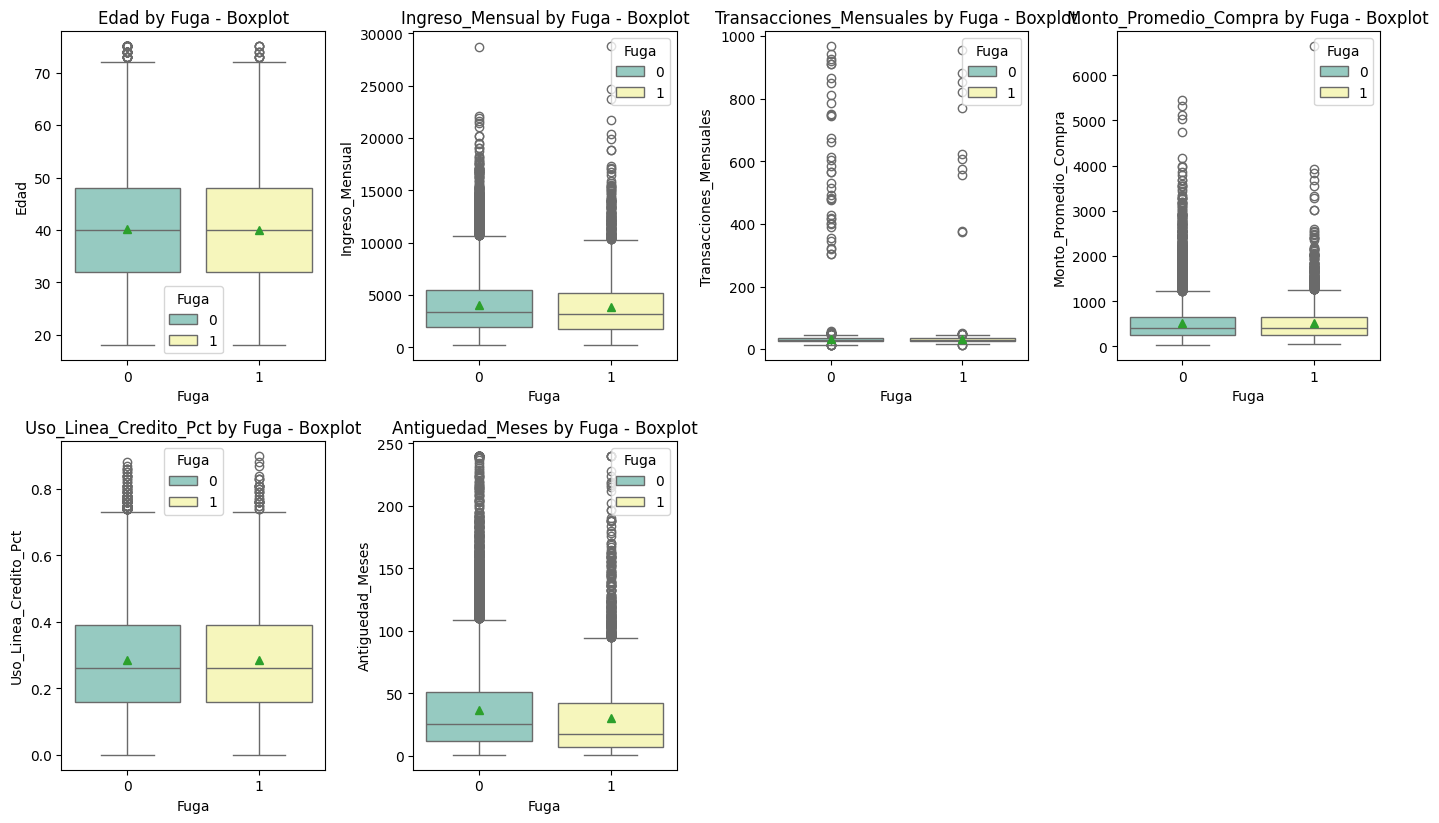

In [69]:
plot_numeric_distributions_by_target(data, 'Fuga', numeric_cols)

Las diferencias entre los grupos son en su mayoría leves, pero destacan menor antigüedad e ingreso en los clientes fugados.

No se aprecian variables numéricas con separación visual fuerte, aunque Antigüedad y Monto Promedio de Compra muestran tendencias útiles para análisis predictivo.

En conjunto, las variables cuantitativas aportan información parcial; su poder explicativo puede mejorar combinándolas con variables categóricas.

In [70]:
from scipy.stats import mannwhitneyu
import numpy as np

def mann_whitney_analysis(data, numeric_cols, target_col, alpha=0.05):
    """
    Performs Mann-Whitney U test for numeric variables vs binary target.
    Calculates effect size using r of Rosenthal.

    Parameters:
    -----------
    data : DataFrame
        The dataset containing numeric and target variables
    numeric_cols : list
        List of numeric column names to test
    target_col : str
        Name of the binary target variable
    alpha : float
        Significance level (default 0.05)

    Returns:
    --------
    DataFrame with test results and effect sizes
    """
    results = []

    # Get unique values of target variable
    target_values = data[target_col].unique()
    if len(target_values) != 2:
        raise ValueError(f"Target variable must be binary. Found {len(target_values)} unique values.")

    group1_label, group2_label = target_values[0], target_values[1]

    for variable in numeric_cols:
        # Separate groups by target variable
        group1 = data[data[target_col] == group1_label][variable].dropna()
        group2 = data[data[target_col] == group2_label][variable].dropna()

        # Check if both groups have data
        if len(group1) == 0 or len(group2) == 0:
            print(f"⚠️  Variable {variable}: No hay datos suficientes")
            continue

        # Perform Mann-Whitney U test
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

        # Calculate effect size (r of Rosenthal)
        n1, n2 = len(group1), len(group2)
        n_total = n1 + n2

        # Calculate z-score approximation for effect size
        # For large samples, U approaches normal distribution
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z_score = abs(statistic - mean_u) / std_u

        # r of Rosenthal = z / sqrt(n)
        r_rosenthal = z_score / np.sqrt(n_total)

        # Interpret effect size
        if r_rosenthal < 0.1:
            effect_size = "Muy pequeño"
        elif r_rosenthal < 0.3:
            effect_size = "Pequeño"
        elif r_rosenthal < 0.5:
            effect_size = "Mediano"
        else:
            effect_size = "Grande"

        # Determine significance
        is_significant = p_value < alpha

        # Calculate descriptive statistics
        median_group1 = group1.median()
        median_group2 = group2.median()
        mean_group1 = group1.mean()
        mean_group2 = group2.mean()

        # Store results
        result = {
            'Variable': variable,
            'U_Statistic': statistic,
            'p_value': p_value,
            'r_Rosenthal': r_rosenthal,
            'Effect_Size': effect_size,
            'Significant': 'Sí' if is_significant else 'No',
            f'Median_{group1_label}': median_group1,
            f'Median_{group2_label}': median_group2,
            f'Mean_{group1_label}': mean_group1,
            f'Mean_{group2_label}': mean_group2,
            f'n_{group1_label}': n1,
            f'n_{group2_label}': n2
        }
        results.append(result)

        # Print detailed results
        print(f"Variable: {variable}")
        print(f"   Mann-Whitney U = {statistic:.2f}")
        print(f"   p-valor = {p_value:.6f}")
        print(f"   r de Rosenthal = {r_rosenthal:.4f} ({effect_size})")
        print(f"   Significativo: {'Sí' if is_significant else 'No'}")
        print(f"   Medianas: {group1_label} = {median_group1:.2f}, {group2_label} = {median_group2:.2f}")
        print(f"   Medias: {group1_label} = {mean_group1:.2f}, {group2_label} = {mean_group2:.2f}")
        print(f"   Tamaños de muestra: {group1_label} = {n1}, {group2_label} = {n2}")

        # Interpretation
        if is_significant:
            if median_group2 > median_group1:
                direction = f"{group2_label} tiende a tener valores MÁS ALTOS"
            else:
                direction = f"{group1_label} tiende a tener valores MÁS ALTOS"
            print(f"Interpretación: {direction}")
        else:
            print(f"Interpretación: No hay diferencia significativa entre grupos")

        print("-" * 60)

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('r_Rosenthal', ascending=False)

    return results_df

In [71]:
# Execute Mann-Whitney analysis for numeric variables vs Churn
numeric_columns = numeric_cols.tolist()
mann_whitney_results = mann_whitney_analysis(data, numeric_columns, 'Fuga')

print("\nRESUMEN DE RESULTADOS:")
print("=" * 60)
display(mann_whitney_results[['Variable', 'U_Statistic', 'p_value', 'r_Rosenthal',
                             'Effect_Size', 'Significant']].round(4))

Variable: Edad
   Mann-Whitney U = 26844713.00
   p-valor = 0.170609
   r de Rosenthal = 0.0099 (Muy pequeño)
   Significativo: No
   Medianas: 1 = 40.00, 0 = 40.00
   Medias: 1 = 39.94, 0 = 40.22
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: No hay diferencia significativa entre grupos
------------------------------------------------------------
Variable: Ingreso_Mensual
   Mann-Whitney U = 26093995.00
   p-valor = 0.000087
   r de Rosenthal = 0.0285 (Muy pequeño)
   Significativo: Sí
   Medianas: 1 = 3221.00, 0 = 3391.00
   Medias: 1 = 3906.93, 0 = 4036.37
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: 0 tiende a tener valores MÁS ALTOS
------------------------------------------------------------
Variable: Transacciones_Mensuales
   Mann-Whitney U = 27220438.50
   p-valor = 0.927215
   r de Rosenthal = 0.0007 (Muy pequeño)
   Significativo: No
   Medianas: 1 = 30.00, 0 = 30.00
   Medias: 1 = 32.02, 0 = 31.43
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpre

,Variable,U_Statistic,p_value,r_Rosenthal,Effect_Size,Significant
5,Antiguedad_Meses,23197274.5,0.0000,0.0999,Muy pequeño,Sí
1,Ingreso_Mensual,26093995.0,0.0001,0.0285,Muy pequeño,Sí
3,Monto_Promedio_Compra,27710666.0,0.1148,0.0114,Muy pequeño,No
0,Edad,26844713.0,0.1706,0.0099,Muy pequeño,No
4,Uso_Linea_Credito_Pct,27326999.5,0.7860,0.0020,Muy pequeño,No
2,Transacciones_Mensuales,27220438.5,0.9272,0.0007,Muy pequeño,No


Las variables Antigüedad_Meses y Ingreso_Mensual muestran diferencias estadísticamente significativas entre clientes que se fugan y los que permanecen (p < 0.05).

Aunque las diferencias son muy pequeñas en magnitud (r < 0.1), sugieren que los clientes más nuevos y de menor ingreso son más propensos a fugarse.

Las demás variables (Edad, Monto_Promedio_Compra, Uso_Linea_Credito_Pct, Transacciones_Mensuales) no presentan diferencias significativas entre ambos grupos, lo que indica que no influyen directamente en la fuga.

# Entrenamiento

## Entrenamiento Data Cruda 

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Use the existing DataFrame ---
df = data.copy() # Use the existing 'data' DataFrame

df = df.drop('ID_Cliente', axis=1)

# --- Codificar variables categóricas ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Separar variables independientes (X) y dependiente (y) ---
X = df_encoded.drop('Fuga', axis=1)
y = df_encoded['Fuga']

# --- Dividir en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Crear y entrenar modelo ---
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# --- Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.4817249539836971
              precision    recall  f1-score   support

           0       0.84      0.45      0.58      3100
           1       0.21      0.64      0.31       703

    accuracy                           0.48      3803
   macro avg       0.53      0.54      0.45      3803
weighted avg       0.73      0.48      0.53      3803

[[1384 1716]
 [ 255  448]]


/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature importance data cruda

Dataset data cruda shape: (19015, 12)
Train set para importance: (15212, 12)
Test set para importance: (3803, 12)
Features: ['Edad', 'Ingreso_Mensual', 'Transacciones_Mensuales', 'Monto_Promedio_Compra', 'Uso_Linea_Credito_Pct', 'Pagos_Atrasados', 'Antiguedad_Meses', 'Productos_Adicionales', 'Genero_M', 'Estado_Civil_Divorciado', 'Estado_Civil_Soltero', 'Estado_Civil_Viudo']

=== TOP 15 FEATURES MÁS IMPORTANTES (DATA CRUDA - TRAINING ONLY) ===
                Feature  Importance
        Ingreso_Mensual    0.169845
  Monto_Promedio_Compra    0.167614
  Uso_Linea_Credito_Pct    0.137363
       Antiguedad_Meses    0.131565
                   Edad    0.126548
Transacciones_Mensuales    0.115519
        Pagos_Atrasados    0.041648
  Productos_Adicionales    0.039132
               Genero_M    0.021758
Estado_Civil_Divorciado    0.016692
     Estado_Civil_Viudo    0.016387
   Estado_Civil_Soltero    0.015927

=== VALIDACIÓN DEL MODELO ===
Accuracy en Training: 1.0000
Accuracy en Test: 0.8141

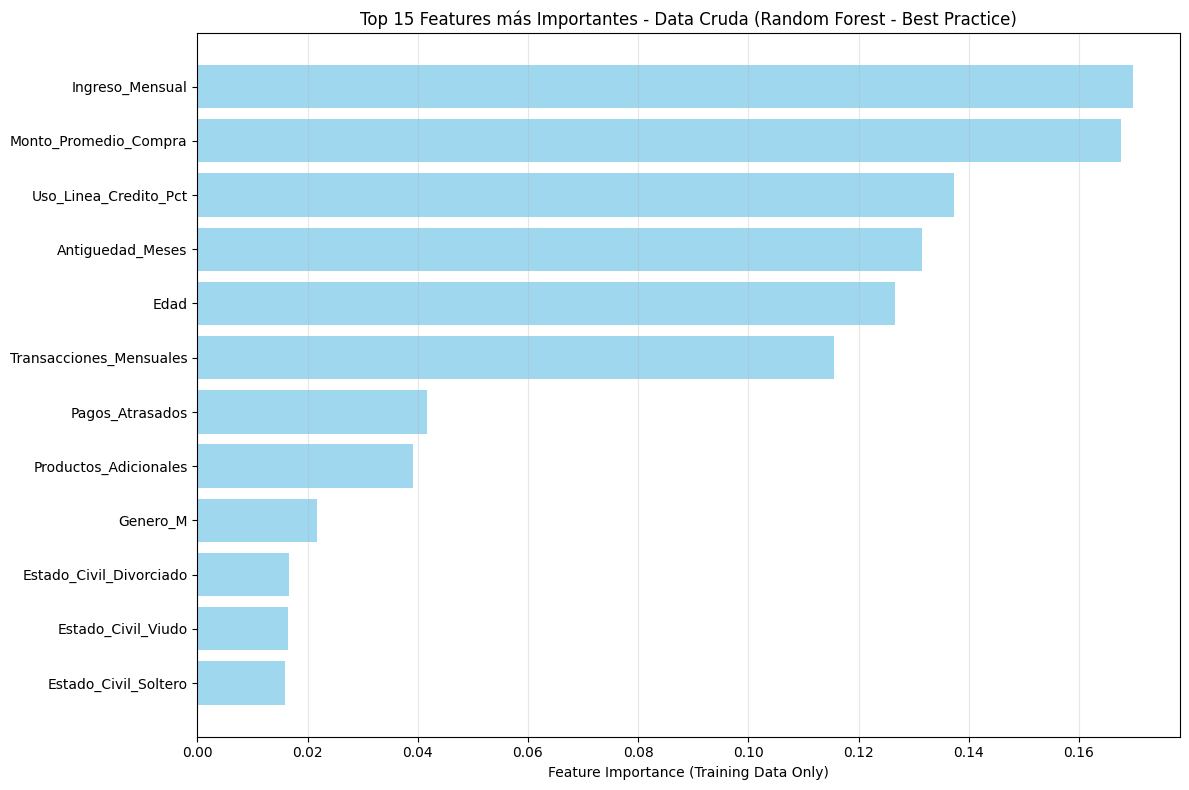


=== ESTADÍSTICAS DE FEATURE IMPORTANCE ===
Total de features: 12
Importancia acumulada top 5: 0.7329
Importancia acumulada top 10: 0.9677
Importancia acumulada top 15: 1.0000

Distribución de importancia:
- Features con importancia > 0.1: 6
- Features con importancia > 0.05: 6
- Features con importancia > 0.01: 12


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_raw_importance = data.copy()

data_raw_importance = data_raw_importance.drop('ID_Cliente', axis=1)

data_raw_importance = pd.get_dummies(data_raw_importance, drop_first=True)

# Separar features y target
y_raw_importance = data_raw_importance['Fuga']
X_raw_importance = data_raw_importance.drop('Fuga', axis=1)

# Manejar valores faltantes
X_raw_importance = X_raw_importance.fillna(X_raw_importance.median())


X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_raw_importance, y_raw_importance, test_size=0.2, random_state=42, stratify=y_raw_importance
)

print(f"Dataset data cruda shape: {X_raw_importance.shape}")
print(f"Train set para importance: {X_train_imp.shape}")
print(f"Test set para importance: {X_test_imp.shape}")
print(f"Features: {list(X_raw_importance.columns)}")


rf_raw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_raw.fit(X_train_imp, y_train_imp)  

importance_df_raw = pd.DataFrame({
    'Feature': X_train_imp.columns,
    'Importance': rf_raw.feature_importances_  
}).sort_values('Importance', ascending=False)

print("\n=== TOP 15 FEATURES MÁS IMPORTANTES (DATA CRUDA - TRAINING ONLY) ===")
print(importance_df_raw.head(15).to_string(index=False))

# Evaluar performance en test set para validar
train_score = rf_raw.score(X_train_imp, y_train_imp)
test_score = rf_raw.score(X_test_imp, y_test_imp)
print(f"\n=== VALIDACIÓN DEL MODELO ===")
print(f"Accuracy en Training: {train_score:.4f}")
print(f"Accuracy en Test: {test_score:.4f}")
print(f"Diferencia (Overfitting check): {train_score - test_score:.4f}")

# Graficar feature importance
plt.figure(figsize=(12, 8))
top_features_raw = importance_df_raw.head(15)
plt.barh(range(len(top_features_raw)), top_features_raw['Importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_features_raw)), top_features_raw['Feature'])
plt.xlabel('Feature Importance (Training Data Only)')
plt.title('Top 15 Features más Importantes - Data Cruda (Random Forest - Best Practice)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n=== ESTADÍSTICAS DE FEATURE IMPORTANCE ===")
print(f"Total de features: {len(importance_df_raw)}")
print(f"Importancia acumulada top 5: {importance_df_raw.head(5)['Importance'].sum():.4f}")
print(f"Importancia acumulada top 10: {importance_df_raw.head(10)['Importance'].sum():.4f}")
print(f"Importancia acumulada top 15: {importance_df_raw.head(15)['Importance'].sum():.4f}")

print(f"\nDistribución de importancia:")
print(f"- Features con importancia > 0.1: {len(importance_df_raw[importance_df_raw['Importance'] > 0.1])}")
print(f"- Features con importancia > 0.05: {len(importance_df_raw[importance_df_raw['Importance'] > 0.05])}")
print(f"- Features con importancia > 0.01: {len(importance_df_raw[importance_df_raw['Importance'] > 0.01])}")

# Guardar para comparación posterior
importance_df_raw_global = importance_df_raw.copy()

# Feature Engineering + Scaling

In [112]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

def fe_log(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()

    def safe_div(a, b):
        b2 = b.replace(0, np.nan) if hasattr(b, "replace") else np.where(b==0, np.nan, b)
        out = a / b2
        return out.fillna(0) if hasattr(out, "fillna") else np.nan_to_num(out, nan=0.0)

    if {'Monto_Promedio_Compra','Transacciones_Mensuales'}.issubset(X.columns):
        X['Gastos_Mensuales_Estimados'] = X['Monto_Promedio_Compra'] * X['Transacciones_Mensuales']
        X['Apalancamiento'] = X['Gastos_Mensuales_Estimados'] - X.get('Ingreso_Mensual', 0)
        X['ratio_gasto_ingreso'] = safe_div(X['Gastos_Mensuales_Estimados'], X.get('Ingreso_Mensual', 1))

    if 'Ingreso_Mensual' in X.columns and 'Edad' in X.columns:
        X['Ingreso_por_Edad'] = safe_div(X['Ingreso_Mensual'], X['Edad'])

    if 'Transacciones_Mensuales' in X.columns and 'Antiguedad_Meses' in X.columns:
        X['Intensidad_Uso'] = X['Transacciones_Mensuales'] / (X['Antiguedad_Meses'] + 1)

    # Flags de binning ligeros (deja también la variable cruda)
    if 'Pagos_Atrasados' in X.columns:
        X['atraso_ge1'] = (X['Pagos_Atrasados'] >= 1).astype(int)
        X['atraso_ge3'] = (X['Pagos_Atrasados'] >= 3).astype(int)

    if 'Productos_Adicionales' in X.columns:
        X['prod_ge1'] = (X['Productos_Adicionales'] >= 1).astype(int)
        X['prod_ge3'] = (X['Productos_Adicionales'] >= 3).astype(int)
    
    for c in ['Ingreso_Mensual','Monto_Promedio_Compra','Antiguedad_Meses',
              'Transacciones_Mensuales','Gastos_Mensuales_Estimados', 'ratio_gasto_ingreso', 'Ingreso_por_Edad', 'Intensidad_Uso']:
        if c in X:
            X[f'log1p_{c}'] = np.log1p(np.clip(X[c], a_min=0, a_max=None))

    return X

fe_transformer = FunctionTransformer(fe_log, validate=False, feature_names_out='one-to-one')
# Inserta ('fe', fe_transformer) antes de ('pre', pre) en tus pipelines.


## Aplicar Feature Engineering para análisis exploratorio

In [113]:
# Aplicar feature engineering directamente (sin pipeline)
data_fe = data.copy()
data_fe = data_fe.drop('ID_Cliente', axis=1)  # Eliminar ID si existe

# Aplicar la función de feature engineering directamente
data_fe = fe_log(data_fe)

print(f"Shape original: {data.shape}")
print(f"Shape con feature engineering: {data_fe.shape}")
print(f"\n=== NUEVAS FEATURES CREADAS ===")

# Identificar las columnas nuevas
original_cols = set(data.columns) - {'ID_Cliente'}
new_cols = set(data_fe.columns) - original_cols

print(f"\nTotal de nuevas features: {len(new_cols)}")
print("\nLista de nuevas features:")
for col in sorted(new_cols):
    print(f"  - {col}")

# Ver primeras filas con nuevas features
print("\n=== PRIMERAS FILAS DE NUEVAS FEATURES ===")
display(data_fe[sorted(new_cols)].head(10))

# Estadísticas descriptivas de nuevas features
print("\n=== ESTADÍSTICAS DESCRIPTIVAS DE NUEVAS FEATURES ===")
display(data_fe[sorted(new_cols)].describe())

Shape original: (19015, 12)
Shape con feature engineering: (19015, 28)

=== NUEVAS FEATURES CREADAS ===

Total de nuevas features: 17

Lista de nuevas features:
  - Apalancamiento
  - Gastos_Mensuales_Estimados
  - Ingreso_por_Edad
  - Intensidad_Uso
  - atraso_ge1
  - atraso_ge3
  - log1p_Antiguedad_Meses
  - log1p_Gastos_Mensuales_Estimados
  - log1p_Ingreso_Mensual
  - log1p_Ingreso_por_Edad
  - log1p_Intensidad_Uso
  - log1p_Monto_Promedio_Compra
  - log1p_Transacciones_Mensuales
  - log1p_ratio_gasto_ingreso
  - prod_ge1
  - prod_ge3
  - ratio_gasto_ingreso

=== PRIMERAS FILAS DE NUEVAS FEATURES ===


,Apalancamiento,Gastos_Mensuales_Estimados,Ingreso_por_Edad,Intensidad_Uso,atraso_ge1,atraso_ge3,log1p_Antiguedad_Meses,log1p_Gastos_Mensuales_Estimados,log1p_Ingreso_Mensual,log1p_Ingreso_por_Edad,log1p_Intensidad_Uso,log1p_Monto_Promedio_Compra,log1p_Transacciones_Mensuales,log1p_ratio_gasto_ingreso,prod_ge1,prod_ge3,ratio_gasto_ingreso
0,14685.64,15928.64,37.666667,16.000000,1,0,0.693147,9.675937,7.126087,3.654978,2.833213,6.212145,3.496508,2.625731,1,0,12.814674
1,6436.48,13065.48,288.217391,9.000000,1,0,1.386294,9.477805,8.799360,5.667179,2.302585,5.896962,3.610918,1.088884,0,0,1.970958
2,5994.19,8045.19,60.323529,0.627907,1,0,3.761200,8.992954,7.626570,4.116164,0.487295,5.700343,3.332205,1.593831,1,1,3.922569
3,9049.20,18723.20,224.976744,2.909091,1,0,2.397895,9.837572,9.177301,5.420432,1.363305,6.373490,3.496508,1.076849,1,0,1.935415
4,6116.18,6316.18,6.666667,13.000000,0,0,0.693147,8.751028,5.303305,2.036882,2.639057,5.496881,3.295837,3.483726,0,0,31.580900
5,8444.68,10788.68,41.857143,5.600000,1,0,1.609438,9.286345,7.760041,3.757872,1.887070,5.956640,3.367296,1.723245,1,0,4.602679
7,1647.37,4742.37,63.163265,0.397260,0,0,4.290459,8.464503,8.037866,4.161431,0.334513,5.103093,3.401197,0.929115,1,0,1.532268
8,3182.04,5495.04,128.500000,1.000000,0,0,3.295837,8.611783,7.746733,4.863681,0.693147,5.320666,3.332205,1.216609,0,0,2.375720
9,13740.50,16073.50,41.660714,3.571429,1,0,1.945910,9.684989,7.755339,3.753278,1.519826,6.467606,3.258097,2.065549,0,0,6.889627
10,20284.00,26940.00,116.771930,0.260870,1,0,4.744932,10.201405,8.803424,4.768750,0.231802,6.801283,3.433987,1.618888,1,1,4.047476



=== ESTADÍSTICAS DESCRIPTIVAS DE NUEVAS FEATURES ===


,Apalancamiento,Gastos_Mensuales_Estimados,Ingreso_por_Edad,Intensidad_Uso,atraso_ge1,atraso_ge3,log1p_Antiguedad_Meses,log1p_Gastos_Mensuales_Estimados,log1p_Ingreso_Mensual,log1p_Ingreso_por_Edad,log1p_Intensidad_Uso,log1p_Monto_Promedio_Compra,log1p_Transacciones_Mensuales,log1p_ratio_gasto_ingreso,prod_ge1,prod_ge3,ratio_gasto_ingreso
count,1.901500e+04,1.901500e+04,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000,19015.000000
mean,1.219021e+04,1.620265e+04,110.282035,2.552043,0.552406,0.048172,3.122089,9.400558,8.028269,4.398728,0.968987,6.010574,3.426791,1.688112,0.617039,0.116277,7.776127
std,2.093787e+04,2.074347e+04,92.642221,4.735956,0.497259,0.214136,1.072523,0.736321,0.793002,0.833887,0.674631,0.695513,0.233932,0.850415,0.486122,0.320565,17.698765
min,-2.389915e+04,7.085000e+02,2.941176,0.082988,0.000000,0.000000,0.693147,6.564560,5.303305,1.371479,0.079723,3.200304,2.564949,0.082624,0.000000,0.000000,0.086133
25%,3.490110e+03,7.354940e+03,47.658814,0.578947,0.000000,0.000000,2.397895,8.903263,7.557995,3.884833,0.456758,5.536330,3.295837,1.062939,0.000000,0.000000,1.894868
50%,8.366240e+03,1.203213e+04,85.226415,1.166667,1.000000,0.000000,3.258097,9.395419,8.119399,4.456977,0.773190,6.008862,3.433987,1.558483,1.000000,0.000000,3.751609
75%,1.605271e+04,1.968095e+04,144.524027,2.666667,1.000000,0.000000,3.912023,9.887457,8.591930,4.980341,1.299283,6.474114,3.555348,2.176657,1.000000,0.000000,7.816782
max,1.127761e+06,1.135715e+06,1219.222222,293.000000,1.000000,1.000000,5.484797,13.942774,10.265836,7.106788,5.683580,8.800325,6.875232,6.713060,1.000000,1.000000,822.085532


## Análisis Univariado nuevas variables

### Variables cuantitativas

In [114]:
new_cols_numeric = list(new_cols)
new_cols_numeric = [col for col in new_cols_numeric if col not in ['prod_ge1', 'prod_ge3', 'atraso_ge1', 'atraso_ge3']]

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_

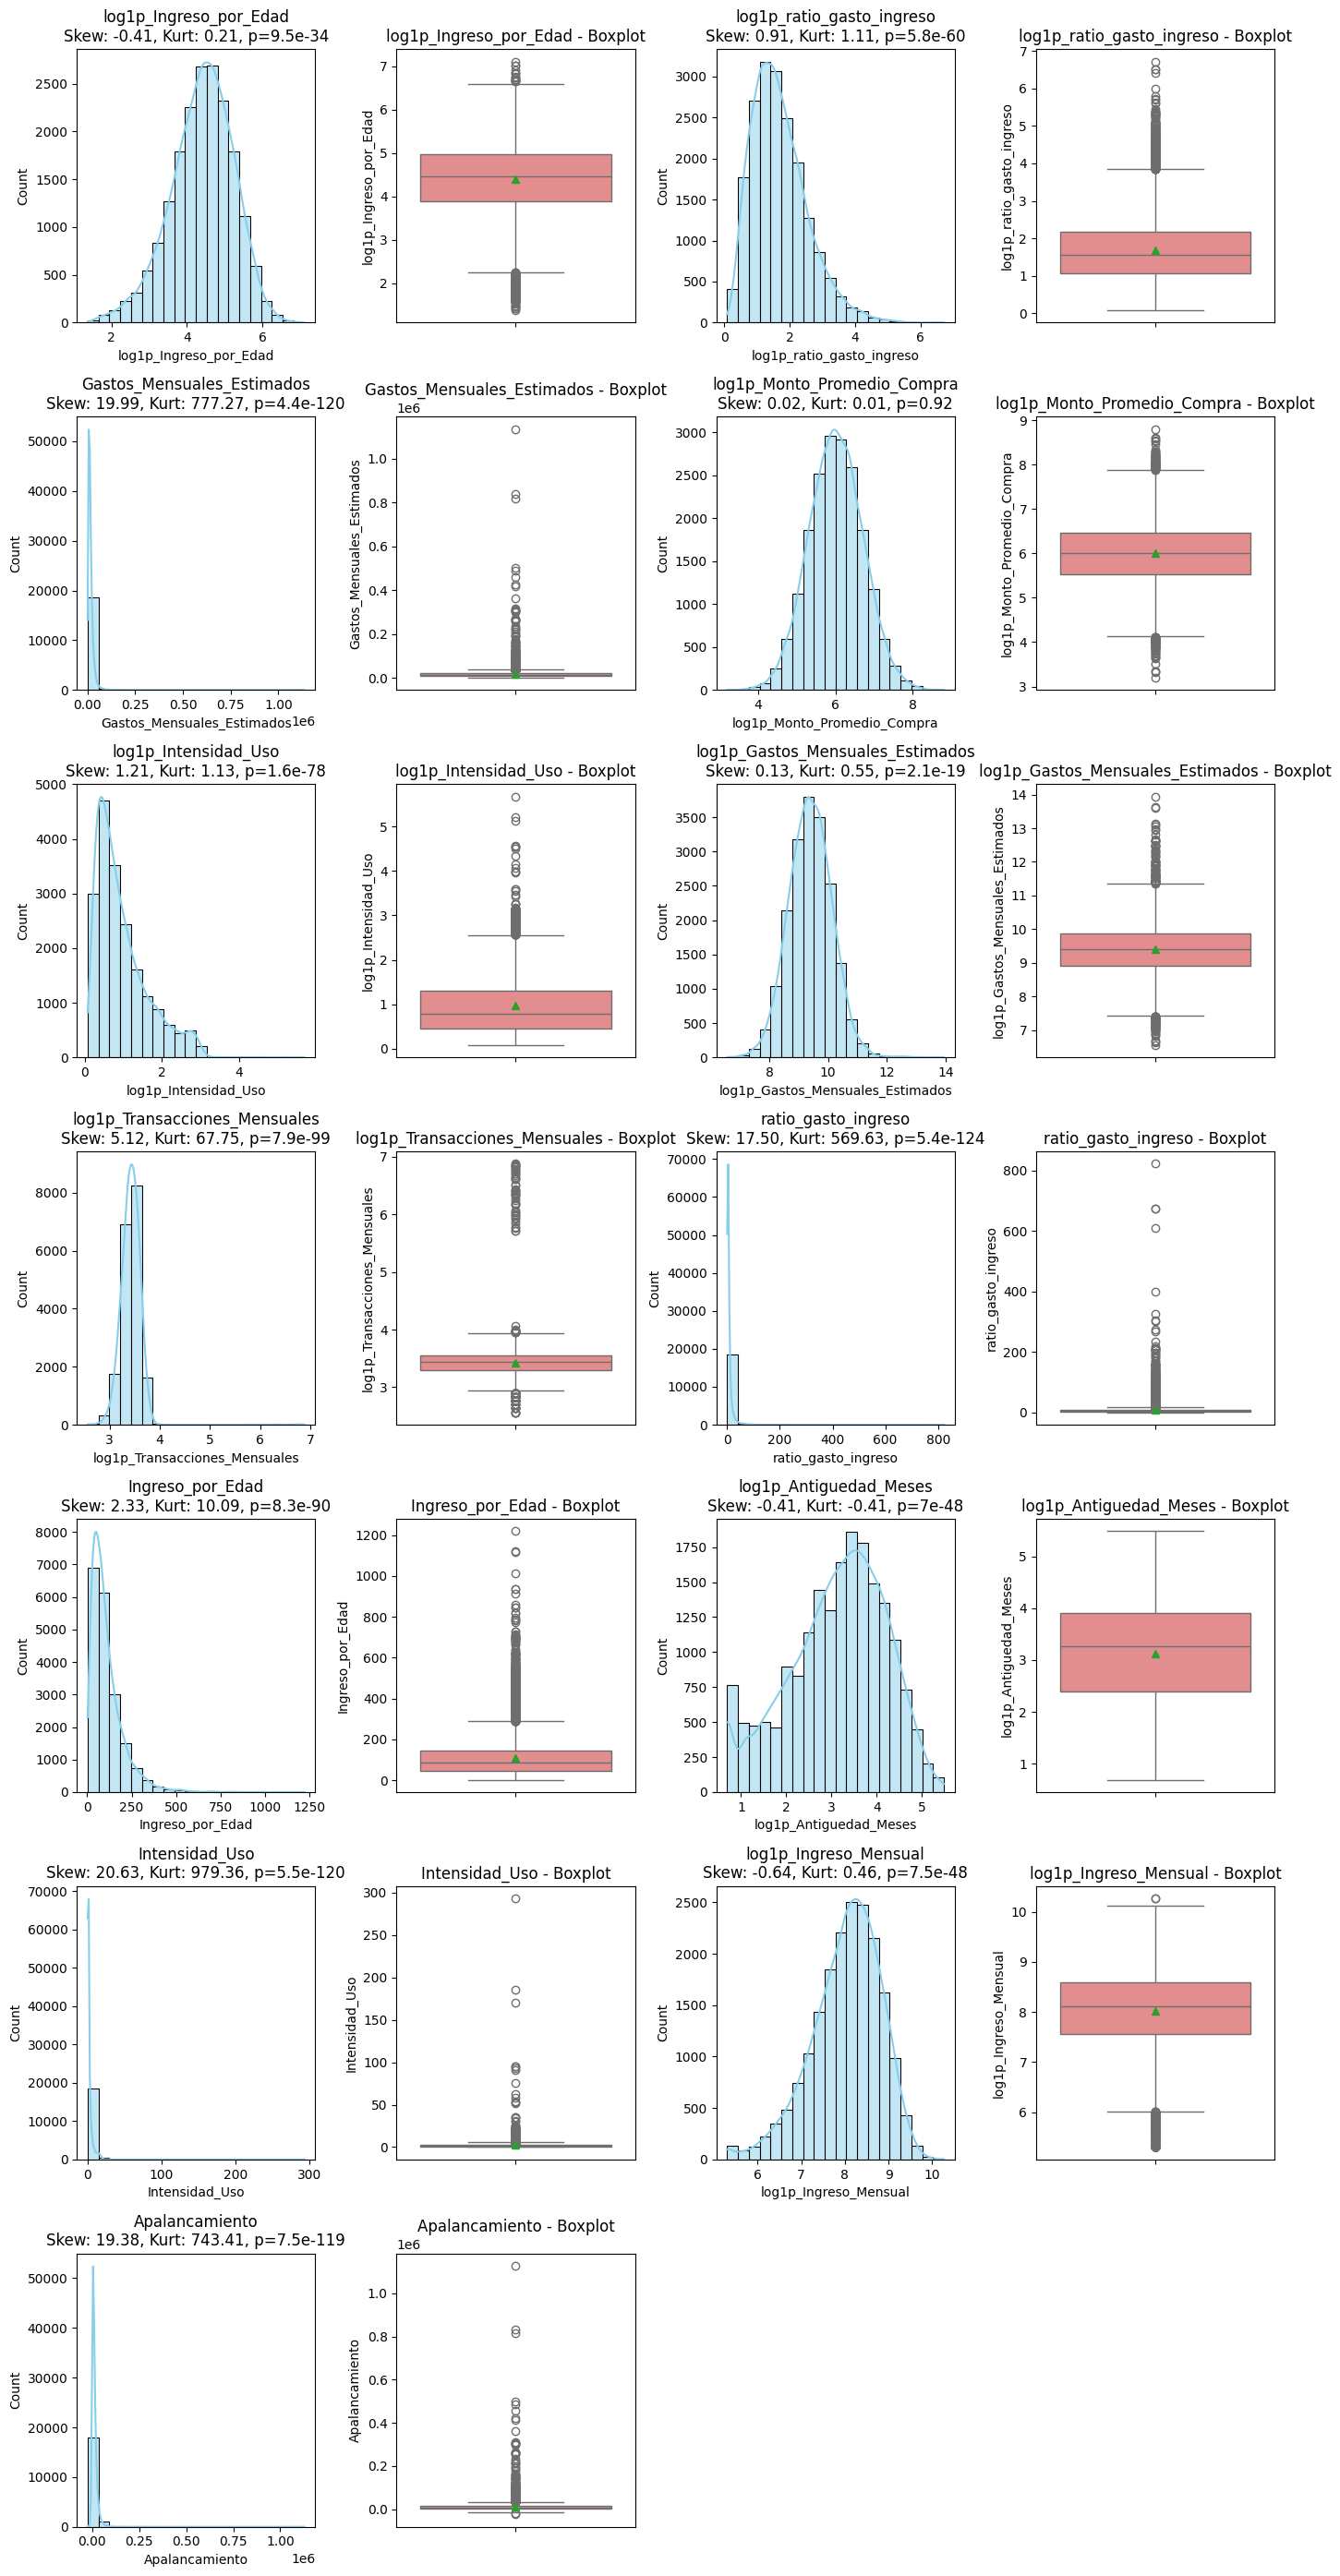

In [115]:
plot_numeric_distributions(data_fe, new_cols_numeric)

### Cualitativas

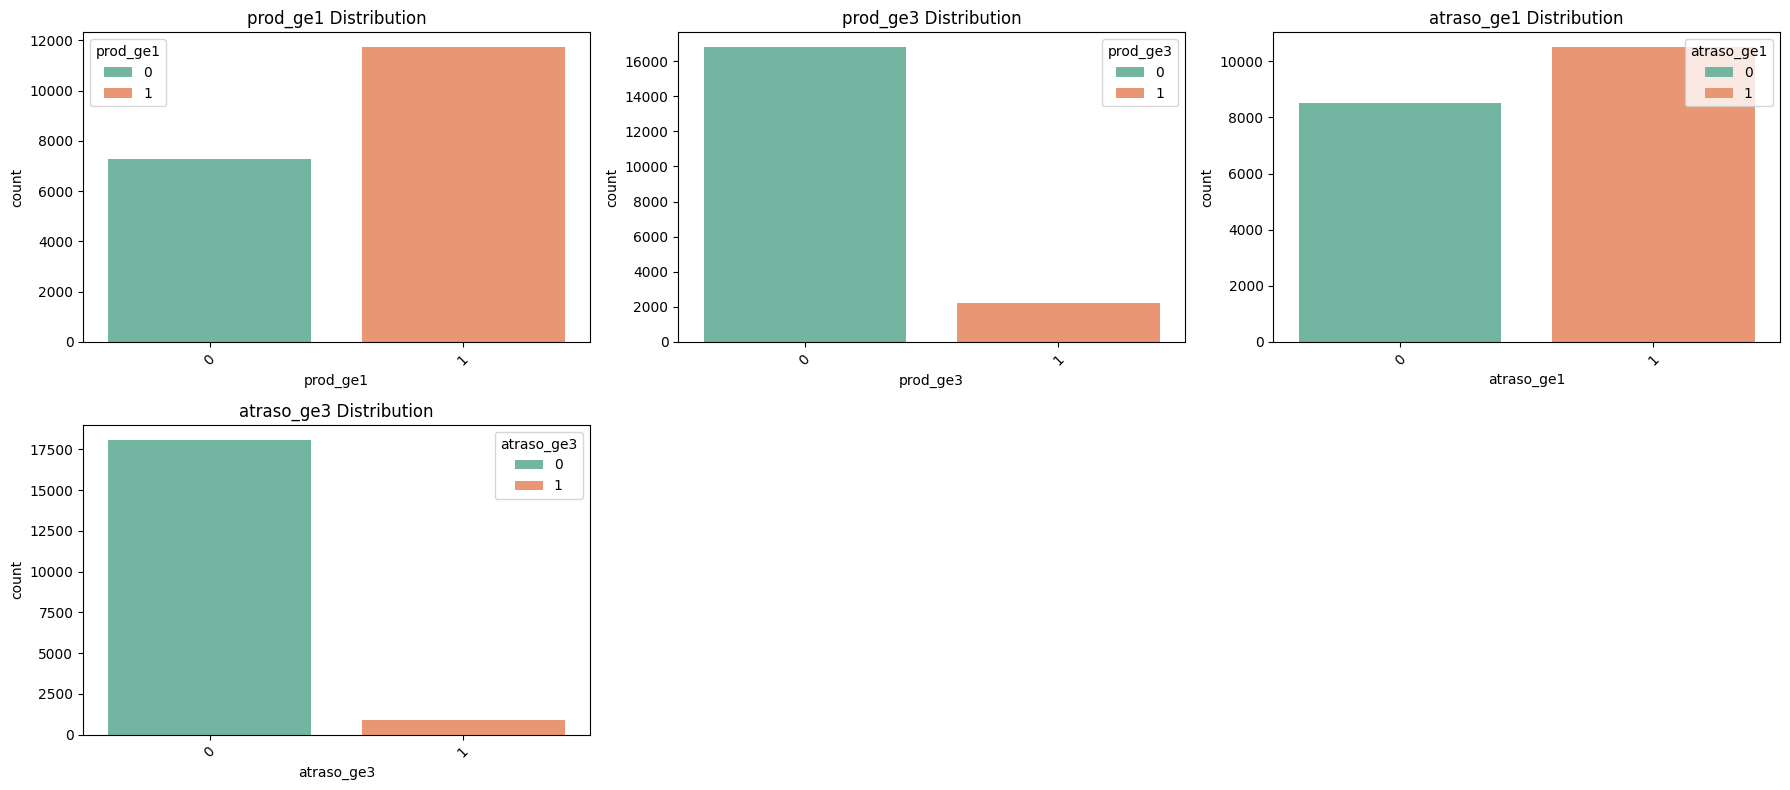

In [111]:
plot_categorical_distributions(data_fe, ['prod_ge1', 'prod_ge3', 'atraso_ge1', 'atraso_ge3'])

## Análisis Multivariado Nuevas Variables

### Cuanti vs Cuanti

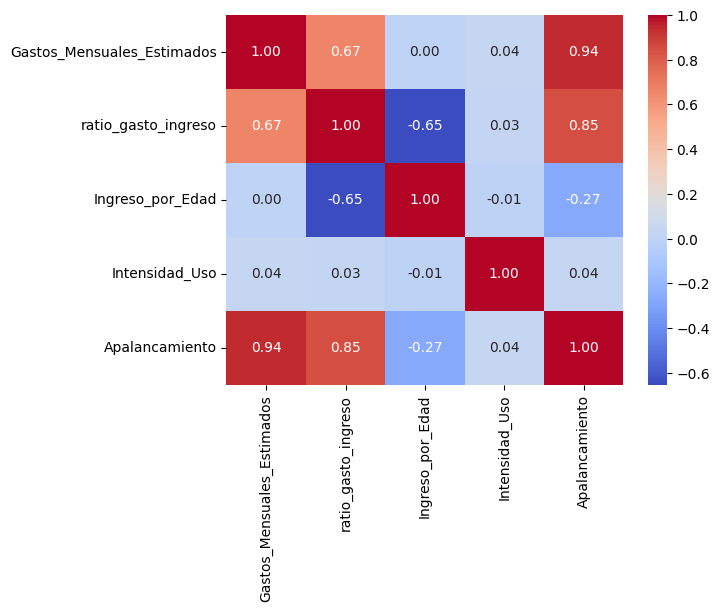

In [116]:
no_logs_numeric = [col for col in new_cols_numeric if not col.startswith('log1p_')]
sns.heatmap(data_fe[no_logs_numeric].corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [117]:
p_values_separman_fe = get_spearman_pvalues(data_fe[no_logs_numeric])
correlation_df(data_fe[no_logs_numeric], p_values_separman_fe, method='spearman')

,Par_Variables,Spearman_ρ,p-valor,Significativo_α05,Fuerza
0,Gastos_Mensuales_Estimados ↔ ratio_gasto_ingreso,0.6676,0.000000,Sí,Fuerte
3,Gastos_Mensuales_Estimados ↔ Apalancamiento,0.9375,0.000000,Sí,Muy fuerte
4,ratio_gasto_ingreso ↔ Ingreso_por_Edad,-0.6519,0.000000,Sí,Fuerte
6,ratio_gasto_ingreso ↔ Apalancamiento,0.8498,0.000000,Sí,Muy fuerte
8,Ingreso_por_Edad ↔ Apalancamiento,-0.2655,0.000000,Sí,Débil
9,Intensidad_Uso ↔ Apalancamiento,0.0364,0.000001,Sí,Muy débil
2,Gastos_Mensuales_Estimados ↔ Intensidad_Uso,0.0356,0.000001,Sí,Muy débil
5,ratio_gasto_ingreso ↔ Intensidad_Uso,0.0318,0.000011,Sí,Muy débil
7,Ingreso_por_Edad ↔ Intensidad_Uso,-0.0062,0.394246,No,Muy débil
1,Gastos_Mensuales_Estimados ↔ Ingreso_por_Edad,0.0020,0.778562,No,Muy débil


### Cuantis vs Cuali

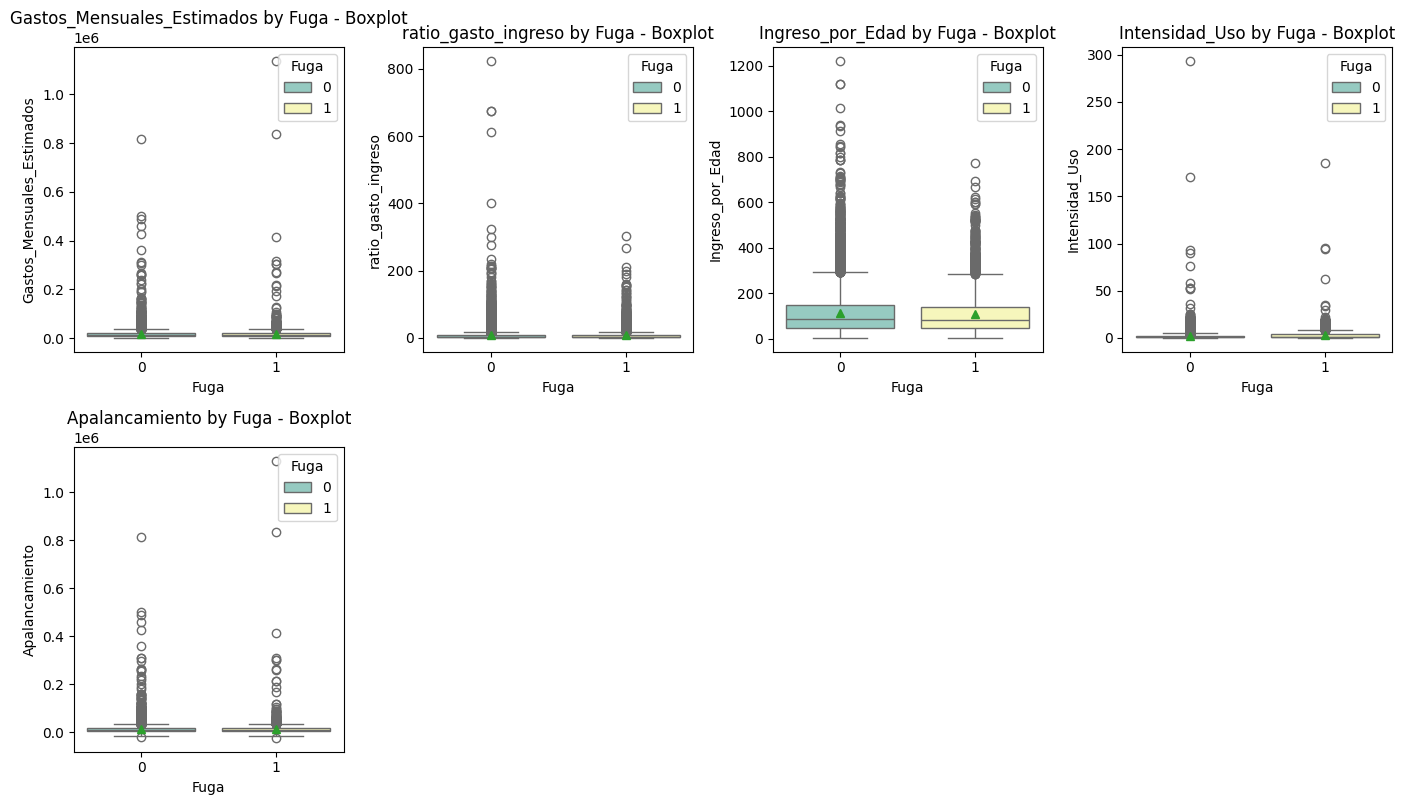

In [118]:
plot_numeric_distributions_by_target(data_fe, 'Fuga', data_fe[no_logs_numeric])

In [119]:
mann_whitney_analysis(data_fe, data_fe[no_logs_numeric], 'Fuga')

Variable: Gastos_Mensuales_Estimados
   Mann-Whitney U = 27657365.00
   p-valor = 0.162828
   r de Rosenthal = 0.0101 (Muy pequeño)
   Significativo: No
   Medianas: 1 = 12128.52, 0 = 12006.29
   Medias: 1 = 16816.64, 0 = 16063.36
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: No hay diferencia significativa entre grupos
------------------------------------------------------------
Variable: ratio_gasto_ingreso
   Mann-Whitney U = 28263219.50
   p-valor = 0.000546
   r de Rosenthal = 0.0251 (Muy pequeño)
   Significativo: Sí
   Medianas: 1 = 3.93, 0 = 3.71
   Medias: 1 = 8.66, 0 = 7.58
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: 1 tiende a tener valores MÁS ALTOS
------------------------------------------------------------
Variable: Ingreso_por_Edad
   Mann-Whitney U = 26287476.50
   p-valor = 0.001091
   r de Rosenthal = 0.0237 (Muy pequeño)
   Significativo: Sí
   Medianas: 1 = 81.71, 0 = 86.08
   Medias: 1 = 107.93, 0 = 110.82
   Tamaños de muestra: 1 = 351

,Variable,U_Statistic,p_value,r_Rosenthal,Effect_Size,Significant,Median_1,Median_0,Mean_1,Mean_0,n_1,n_0
3,Intensidad_Uso,31259019.5,1.966978e-42,0.099002,Muy pequeño,Sí,1.525063,1.103448,3.230031,2.398239,3516,15499
1,ratio_gasto_ingreso,28263219.5,5.455917e-04,0.025072,Muy pequeño,Sí,3.933069,3.714108,8.659125,7.575816,3516,15499
2,Ingreso_por_Edad,26287476.5,1.090681e-03,0.023685,Muy pequeño,Sí,81.708847,86.076923,107.929653,110.815681,3516,15499
4,Apalancamiento,27822549.5,5.026084e-02,0.014197,Muy pequeño,No,8540.150000,8335.120000,12909.710043,12026.986585,3516,15499
0,Gastos_Mensuales_Estimados,27657365.0,1.628278e-01,0.010121,Muy pequeño,No,12128.520000,12006.290000,16816.642068,16063.358803,3516,15499


### Cuali vs Cuali 

In [120]:
realizar_pruebas_chi2_churn(data_fe, ['prod_ge1', 'prod_ge3', 'atraso_ge1', 'atraso_ge3'])

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN


,Variable,Chi2_Estadistico,p_valor,Grados_Libertad,V_Cramer,Tamaño_Efecto,Es_Significativo,Interpretacion
0,prod_ge1,27.719136,1.402683e-07,1,0.038181,Muy débil,Sí,Rechazar H0 (hay asociación)
3,atraso_ge3,20.676973,5.436589e-06,1,0.032976,Muy débil,Sí,Rechazar H0 (hay asociación)
1,prod_ge3,8.262905,4.046332e-03,1,0.020846,Muy débil,Sí,Rechazar H0 (hay asociación)
2,atraso_ge1,0.608183,4.354729e-01,1,0.005655,Muy débil,No,No rechazar H0 (no hay asociación)


# Entrenamiento post feature engineering

In [229]:
variables_interesantes = ['log1p_Ingreso_por_Edad', 'log1p_ratio_gasto_ingreso',  'log1p_Monto_Promedio_Compra', 'log1p_Intensidad_Uso', 'log1p_Transacciones_Mensuales', 'log1p_Antiguedad_Meses', 'log1p_Ingreso_Mensual']

In [230]:
variables_interesantes = variables_interesantes + ['Uso_Linea_Credito_Pct', 'prod_ge1', 'prod_ge3', 'atraso_ge1', 'atraso_ge3', 'Fuga' ]

In [231]:
variables_interesantes += ['Edad','Genero', 'Estado_Civil', 'log1p_Gastos_Mensuales_Estimados', 'Apalancamiento']

In [232]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              19015 non-null  float64
 1   Genero                            19015 non-null  object 
 2   Estado_Civil                      19015 non-null  object 
 3   Ingreso_Mensual                   19015 non-null  float64
 4   Transacciones_Mensuales           19015 non-null  int64  
 5   Monto_Promedio_Compra             19015 non-null  float64
 6   Uso_Linea_Credito_Pct             19015 non-null  float64
 7   Pagos_Atrasados                   19015 non-null  int64  
 8   Antiguedad_Meses                  19015 non-null  int64  
 9   Productos_Adicionales             19015 non-null  int64  
 10  Fuga                              19015 non-null  int64  
 11  Gastos_Mensuales_Estimados        19015 non-null  float64
 12  Apalancam

In [233]:
data_fe_train = data_fe[variables_interesantes]

In [234]:
# data_fe_train['Productos_Adicionales'] = data_fe_train['Productos_Adicionales'].astype('category')
# data_fe_train['Pagos_Atrasados'] = data_fe_train['Pagos_Atrasados'].astype('category')
print(data_fe_train['prod_ge1'].value_counts())
print(data_fe_train['prod_ge3'].value_counts())

prod_ge1
1    11733
0     7282
Name: count, dtype: int64
prod_ge3
0    16804
1     2211
Name: count, dtype: int64


In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_fe = data_fe_train.copy() 

df_fe_encoded = pd.get_dummies(df_fe, drop_first=True)

# --- Separar variables independientes (X) y dependiente (y) ---
X = df_fe_encoded.drop('Fuga', axis=1)
y = df_fe_encoded['Fuga']

# --- Dividir en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Crear y entrenar modelo ---
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# --- Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.5984748882461215
              precision    recall  f1-score   support

           0       0.85      0.61      0.71      3100
           1       0.24      0.53      0.33       703

    accuracy                           0.60      3803
   macro avg       0.54      0.57      0.52      3803
weighted avg       0.74      0.60      0.64      3803

[[1906 1194]
 [ 333  370]]


/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [238]:
pipe_df = data.copy()

In [241]:
pipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               19015 non-null  int64  
 1   Edad                     19015 non-null  float64
 2   Genero                   19015 non-null  object 
 3   Estado_Civil             19015 non-null  object 
 4   Ingreso_Mensual          19015 non-null  float64
 5   Transacciones_Mensuales  19015 non-null  int64  
 6   Monto_Promedio_Compra    19015 non-null  float64
 7   Uso_Linea_Credito_Pct    19015 non-null  float64
 8   Pagos_Atrasados          19015 non-null  int64  
 9   Antiguedad_Meses         19015 non-null  int64  
 10  Productos_Adicionales    19015 non-null  int64  
 11  Fuga                     19015 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.4+ MB


In [250]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from dataclasses import dataclass

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score
from sklearn.impute import SimpleImputer

def robust_z(x, med, iqr, eps=1e-9):
    return (x - med) / (iqr + eps)

def clip01(x, eps=1e-3):
    return np.clip(x, eps, 1 - eps)

class FeatureBuilder(BaseEstimator, TransformerMixin):
    """
    Versión clone-safe: el __init__ NO muta los parámetros.
    """
    def __init__(self,
                 num_cols=('Edad','Ingreso_Mensual','Transacciones_Mensuales','Monto_Promedio_Compra',
                           'Uso_Linea_Credito_Pct','Pagos_Atrasados','Antiguedad_Meses','Productos_Adicionales'),
                 cat_cols=('Genero','Estado_Civil'),
                 target_col='Fuga'):
        # ⬇️ Guardar EXACTAMENTE lo que llega (tuplas), sin list(), sin copiar.
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.target_col = target_col

    def fit(self, X, y=None):
        df = X.copy()
    
        # imputaciones (no modifican los atributos del estimador)
        self.medians_ = {c: np.nanmedian(df[c]) for c in self.num_cols if c in df.columns}
        for c in self.num_cols:
            if c in df:
                df[c] = df[c].fillna(self.medians_[c])

        self.cat_fill_ = {c: (df[c].mode(dropna=True).iloc[0] if c in df and df[c].notna().any() else 'Desconocido')
                          for c in self.cat_cols if c in df.columns}
        for c in self.cat_cols:
            if c in df:
                df[c] = df[c].fillna(self.cat_fill_.get(c, 'Desconocido')).astype(str)

        tmp = self._build_features(df, is_fit=True)

        # umbrales/estadísticos para flags e índices
        self.ing_q1_ = np.nanquantile(df['Ingreso_Mensual'], 0.25) if 'Ingreso_Mensual' in df else 0.0
        self.tx_q1_  = np.nanquantile(df['Transacciones_Mensuales'], 0.25) if 'Transacciones_Mensuales' in df else 0.0
        self.sp_q3_  = np.nanquantile(tmp['spend_income'], 0.75) if 'spend_income' in tmp else 1.0

        def med_iqr(s):
            med = np.nanmedian(s); q1 = np.nanquantile(s,0.25); q3 = np.nanquantile(s,0.75); iqr = q3-q1
            return med, iqr if iqr>0 else 1.0

        self.rstats_ = {}
        for col in ['logit_Util','overdue_rate','log_Tenure','Productos_Adicionales',
                    'log_Tx','log_Monto','Productos_Adicionales','log_Ingreso']:
            if col in tmp:
                self.rstats_[col] = med_iqr(tmp[col])

        return self

    def _build_features(self, df, is_fit=False):
        out = df.copy()

        # Transformaciones
        if 'Ingreso_Mensual' in out:   out['log_Ingreso'] = np.log1p(out['Ingreso_Mensual'].clip(lower=0))
        if 'Transacciones_Mensuales' in out: out['log_Tx'] = np.log1p(out['Transacciones_Mensuales'].clip(lower=0))
        if 'Monto_Promedio_Compra' in out:  out['log_Monto'] = np.log1p(out['Monto_Promedio_Compra'].clip(lower=0))
        if 'Antiguedad_Meses' in out:  out['log_Tenure'] = np.log1p(out['Antiguedad_Meses'].clip(lower=0))
        if 'Uso_Linea_Credito_Pct' in out:
            out['logit_Util'] = np.log(clip01(out['Uso_Linea_Credito_Pct'])/ (1-clip01(out['Uso_Linea_Credito_Pct'])))

        # Discretas
        if 'Pagos_Atrasados' in out:
            out['has_overdue']  = (out['Pagos_Atrasados']>0).astype(int)
            out['overdue_ge2']  = (out['Pagos_Atrasados']>=2).astype(int)
        if {'Pagos_Atrasados','Antiguedad_Meses'}.issubset(out.columns):
            out['overdue_rate'] = out['Pagos_Atrasados'] / (1 + out['Antiguedad_Meses']/12.0)

        if 'Productos_Adicionales' in out:
            out['has_products'] = (out['Productos_Adicionales']>0).astype(int)
            out['multi_product'] = (out['Productos_Adicionales']>=3).astype(int)

        # Ratios
        if {'Transacciones_Mensuales','Monto_Promedio_Compra'}.issubset(out.columns):
            out['gasto_mensual'] = out['Transacciones_Mensuales'] * out['Monto_Promedio_Compra']
        if {'gasto_mensual','Ingreso_Mensual'}.issubset(out.columns):
            out['spend_income']  = out['gasto_mensual'] / (out['Ingreso_Mensual'] + 1e-6)
            out['ticket_income'] = out['Monto_Promedio_Compra'] / (out['Ingreso_Mensual'] + 1e-6)
            out['ingreso_residual'] = out['Ingreso_Mensual'] - out['gasto_mensual']
            out['residual_negativo'] = (out['ingreso_residual']<0).astype(int)
        if {'Uso_Linea_Credito_Pct','Productos_Adicionales'}.issubset(out.columns):
            out['util_per_prod'] = out['Uso_Linea_Credito_Pct'] / (1 + out['Productos_Adicionales'])
        if {'Transacciones_Mensuales','Productos_Adicionales'}.issubset(out.columns):
            out['tx_per_prod'] = out['Transacciones_Mensuales'] / (1 + out['Productos_Adicionales'])
        if {'Transacciones_Mensuales','Antiguedad_Meses'}.issubset(out.columns):
            out['tx_per_tenure'] = (out['Transacciones_Mensuales']*12.0) / (1 + out['Antiguedad_Meses'])
        if {'Pagos_Atrasados','Productos_Adicionales'}.issubset(out.columns):
            out['overdue_per_prod'] = out['Pagos_Atrasados'] / (1 + out['Productos_Adicionales'])

        # Bins
        if 'Antiguedad_Meses' in out:
            bins = np.array([0,3,6,12,24,np.inf])
            labels = ['0-3','3-6','6-12','12-24','24+']
            out['tenure_bin'] = pd.cut(out['Antiguedad_Meses'], bins=bins, labels=labels, right=True, include_lowest=True).astype(str)

        if not is_fit and hasattr(self, 'ing_q1_') and 'Ingreso_Mensual' in out:
            q2 = np.nanquantile(out['Ingreso_Mensual'],0.50)
            q3 = np.nanquantile(out['Ingreso_Mensual'],0.75)
            edges = [-np.inf, self.ing_q1_, q2, q3, np.inf]
            out['ing_bin'] = pd.cut(out['Ingreso_Mensual'], bins=edges, labels=['Q1','Q2','Q3','Q4']).astype(str)
            out['ing_q1_flag'] = (out['Ingreso_Mensual']<=self.ing_q1_).astype(int)
        elif is_fit and 'Ingreso_Mensual' in out:
            q1 = np.nanquantile(out['Ingreso_Mensual'],0.25)
            q2 = np.nanquantile(out['Ingreso_Mensual'],0.50)
            q3 = np.nanquantile(out['Ingreso_Mensual'],0.75)
            edges = [-np.inf, q1, q2, q3, np.inf]
            out['ing_bin'] = pd.cut(out['Ingreso_Mensual'], bins=edges, labels=['Q1','Q2','Q3','Q4']).astype(str)
            out['ing_q1_flag'] = (out['Ingreso_Mensual']<=q1).astype(int)

        if 'Uso_Linea_Credito_Pct' in out:
            u = out['Uso_Linea_Credito_Pct']
            out['util_band'] = pd.cut(u, bins=[-np.inf,0.3,0.6,0.8,np.inf], labels=['<=0.3','0.3-0.6','0.6-0.8','>0.8']).astype(str)

        # Flags
        if not is_fit and hasattr(self, 'sp_q3_'):
            if 'spend_income' in out and 'Ingreso_Mensual' in out:
                out['flag_high_strain'] = ((out['spend_income']>=self.sp_q3_) & (out['Ingreso_Mensual']<=self.ing_q1_)).astype(int)
        if 'Antiguedad_Meses' in out and 'Productos_Adicionales' in out:
            out['flag_new_low_bundle'] = ((out['Antiguedad_Meses']<=6) & (out['Productos_Adicionales']<=1)).astype(int)
        if 'Uso_Linea_Credito_Pct' in out and 'Pagos_Atrasados' in out:
            out['flag_util_overdue'] = ((out['Uso_Linea_Credito_Pct']>=0.8) & (out['Pagos_Atrasados']>=2)).astype(int)
        if 'Antiguedad_Meses' in out and 'Transacciones_Mensuales' in out and not is_fit:
            out['flag_cold_start_low_use'] = ((out['Antiguedad_Meses']<=12) & (out['Transacciones_Mensuales']<=self.tx_q1_)).astype(int)
        if {'Pagos_Atrasados','Productos_Adicionales','Antiguedad_Meses'}.issubset(out.columns):
            out['flag_loyal'] = ((out['Pagos_Atrasados']==0) & (out['Productos_Adicionales']>=4) & (out['Antiguedad_Meses']>=24)).astype(int)

        # Interacciones
        if 'logit_Util' in out and 'overdue_ge2' in out: out['int_util_overdue2'] = out['logit_Util'] * out['overdue_ge2']
        if 'spend_income' in out and 'has_overdue' in out: out['int_spend_overdue'] = out['spend_income'] * out['has_overdue']
        if 'log_Monto' in out and 'overdue_ge2' in out:    out['int_monto_overdue2'] = out['log_Monto'] * out['overdue_ge2']
        if 'log_Tx' in out and 'overdue_ge2' in out:       out['int_tx_overdue2'] = out['log_Tx'] * out['overdue_ge2']
        if 'logit_Util' in out and 'ing_q1_flag' in out:   out['int_util_ingQ1'] = out['logit_Util'] * out['ing_q1_flag']
        if 'Antiguedad_Meses' in out and 'has_products' in out:
            out['int_new_nobundle'] = ((out['Antiguedad_Meses']<=6).astype(int) * (1 - out['has_products'])).astype(int)

        # Índices robustos
        if not is_fit and hasattr(self, 'rstats_'):
            def rz(col):
                med, iqr = self.rstats_[col]
                return robust_z(out[col], med, iqr) if col in out else 0.0
            out['risk_idx'] = rz('logit_Util') + rz('overdue_rate') - rz('log_Tenure') - rz('Productos_Adicionales')
            out['eng_idx']  = rz('log_Tx') + rz('log_Monto') + rz('Productos_Adicionales') + rz('log_Tenure')

        # Asegurar tipos categóricos
        for c in self.cat_cols:
            if c in out: out[c] = out[c].astype(str)
        for c in ['tenure_bin','ing_bin','util_band']:
            if c in out: out[c] = out[c].astype(str)

        return out

    def transform(self, X):
        df = X.copy()
        for c in self.num_cols:
            if c in df:
                df[c] = df[c].fillna(self.medians_.get(c, 0))
        for c in self.cat_cols:
            if c in df:
                df[c] = df[c].fillna(self.cat_fill_.get(c, 'Desconocido')).astype(str)
        return self._build_features(df, is_fit=False)



def make_model_pipeline():
    """
    Devuelve un Pipeline sklearn listo:
      FeatureBuilder -> imputación extra -> preprocesamiento -> LogisticRegression
    """
    feat = FeatureBuilder()

    # Selectores automáticos por dtype
    num_sel = selector(dtype_include=np.number)
    cat_sel = selector(dtype_include=object)

    pre = ColumnTransformer(
        transformers=[
            # numéricas: imputación (por si quedó algo) + robust scaling
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler(with_centering=True, with_scaling=True))
            ]), num_sel),
            # categóricas: imputación + one-hot
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), cat_sel)
        ],
        remainder='drop'
    )

    clf = LogisticRegression(
        solver='saga',
        penalty='l2',
        C=1.0,
        class_weight='balanced',
        max_iter=10000,
        n_jobs=None,
        random_state=42 
    )

    pipe = Pipeline(steps=[
        ('feat', feat),
        ('pre', pre),
        ('clf', clf)
    ])
    return pipe


# ---------- Calibración de umbral con restricción de recall ----------
@dataclass
class ThresholdCVResult:
    threshold: float
    cv_precision: float
    cv_recall: float
    cv_f1: float
    cv_avg_precision: float

def calibrate_threshold_with_cv(pipe, X, y, recall_target=0.70, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    precisions, recalls, f1s, aps, thrs = [], [], [], [], []

    for tr, va in skf.split(X, y):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]

        pipe.fit(X_tr, y_tr)
        p_va = pipe.predict_proba(X_va)[:, 1]

        prec, rec, thr = precision_recall_curve(y_va, p_va)
        # Alinear: thresholds tiene len = len(prec)-1
        prec_, rec_, thr_ = prec[:-1], rec[:-1], thr

        mask = rec_ >= recall_target
        if mask.any():
            idx = np.argmax(prec_[mask])  # máxima precisión cumpliendo recall
            best_thr = thr_[mask][idx]
        else:
            # si ninguna alcanza el recall, usa mínimo threshold (max recall)
            best_thr = thr_.min() if len(thr_) else 0.5

        y_hat = (p_va >= best_thr).astype(int)
        P = precision_score(y_va, y_hat, zero_division=0)
        R = recall_score(y_va, y_hat, zero_division=0)
        F = f1_score(y_va, y_hat, zero_division=0)
        AP = average_precision_score(y_va, p_va)

        precisions.append(P); recalls.append(R); f1s.append(F); aps.append(AP); thrs.append(best_thr)

    return ThresholdCVResult(
        threshold=float(np.median(thrs)),
        cv_precision=float(np.mean(precisions)),
        cv_recall=float(np.mean(recalls)),
        cv_f1=float(np.mean(f1s)),
        cv_avg_precision=float(np.mean(aps))
    )


# ---------- Ejemplo de uso ----------
# df = ...  # tu DataFrame original
# y = df['Fuga'].astype(int)           # 1 = churn, 0 = no churn
# X = df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

# pipe = make_model_pipeline()
# result = calibrate_threshold_with_cv(pipe, X, y, recall_target=0.70, n_splits=5, random_state=42)
# thr = result.threshold
# print("Threshold CV:", result)

# # Entrenar final y predecir con el umbral calibrado
# pipe.fit(X, y)
# proba = pipe.predict_proba(X)[:,1]
# y_pred = (proba >= thr).astype(int)
# print("Train metrics @thr:", 
#       "Precision", precision_score(y, y_pred), 
#       "Recall", recall_score(y, y_pred), 
#       "F1", f1_score(y, y_pred))
y = pipe_df['Fuga'].astype(int)           # 1 = churn, 0 = no churn
X = pipe_df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

pipe = make_model_pipeline()
result = calibrate_threshold_with_cv(pipe, X, y, recall_target=0.70, n_splits=5, random_state=42)
thr = result.threshold
print("Threshold CV:", result)

# Entrenar final y predecir con el umbral calibrado
pipe.fit(X, y)
proba = pipe.predict_proba(X)[:,1]
y_pred = (proba >= thr).astype(int)
print("Train metrics @thr:", 
      "Precision", precision_score(y, y_pred), 
      "Recall", recall_score(y, y_pred), 
      "F1", f1_score(y, y_pred))    

Threshold CV: ThresholdCVResult(threshold=0.44431070960193114, cv_precision=0.209529598001213, cv_recall=0.7158739331436701, cv_f1=0.3240961233005002, cv_avg_precision=0.23729652369632995)
Train metrics @thr: Precision 0.21261082111193969 Recall 0.729806598407281 F1 0.3292909849213988


In [253]:
# --- Scorer: precisión máxima cumpliendo recall ≥ target (usa predict_proba) ---
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import numpy as np
import pandas as pd

def precision_at_recall_callable(recall_target=0.70):
    """
    Devuelve un callable compatible con sklearn: score(estimator, X, y) -> float
    que calcula la máxima precisión alcanzable cumpliendo recall >= recall_target.
    """
    def _score(estimator, X, y):
        proba = estimator.predict_proba(X)[:, 1]
        prec, rec, thr = precision_recall_curve(y, proba)
        prec, rec = prec[:-1], rec[:-1]   # alinear con thresholds
        mask = rec >= recall_target
        if not np.any(mask):
            return 0.0
        return float(np.max(prec[mask]))
    return _score

def pick_threshold_at_recall(y_true, y_scores, recall_target=0.70):
    prec, rec, thr = precision_recall_curve(y_true, y_scores)
    prec, rec = prec[:-1], rec[:-1]
    mask = rec >= recall_target
    if not np.any(mask):
        return float(thr.min()) if len(thr) else 0.5
    return float(thr[mask][np.argmax(prec[mask])])

# ---------- Train / Test split (sin fuga) ----------
y = df['Fuga'].astype(int)
X = df.drop(columns=['Fuga','ID_Cliente'], errors='ignore')

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

pipe = make_model_pipeline()

# ---------- Grid de hiperparámetros ----------
param_grid = [
    {'clf__penalty': ['l1','l2'], 'clf__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
    {'clf__penalty': ['elasticnet'], 'clf__l1_ratio': [0.1,0.3,0.5,0.7,0.9],
     'clf__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = precision_at_recall_callable(recall_target=0.70)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,   # <<— callable (no make_scorer)
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=1
)

grid.fit(X_tr, y_tr)

print("Best params:", grid.best_params_)
print("CV best precision@recall>=0.70:", grid.best_score_)

# ---------- Umbral calibrado SOLO en TRAIN ----------
best_pipe = grid.best_estimator_
p_tr = best_pipe.predict_proba(X_tr)[:,1]
thr = pick_threshold_at_recall(y_tr, p_tr, recall_target=0.70)
print("Chosen threshold (train):", thr)

# ---------- Métricas FINALES en TEST ----------
p_te = best_pipe.predict_proba(X_te)[:,1]
yhat_te = (p_te >= thr).astype(int)

prec = precision_score(y_te, yhat_te, zero_division=0)
rec  = recall_score(y_te, yhat_te, zero_division=0)
f1   = f1_score(y_te, yhat_te, zero_division=0)
auc  = roc_auc_score(y_te, p_te)
ap   = average_precision_score(y_te, p_te)

print("\n=== FINAL TEST METRICS @ threshold calibrated on TRAIN ===")
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f} | AP: {ap:.3f}")
print("\nConfusion matrix (test):\n", confusion_matrix(y_te, yhat_te))
print("\nClassification report (test):\n", classification_report(y_te, yhat_te, digits=3))

# (Opcional) Importancias (coeficientes) post-OHE
try:
    feat_names = grid.best_estimator_.named_steps['pre'].get_feature_names_out()
    coefs = grid.best_estimator_.named_steps['clf'].coef_.ravel()
    top_pos = pd.Series(coefs, index=feat_names).sort_values(ascending=False).head(25)
    top_neg = pd.Series(coefs, index=feat_names).sort_values().head(25)
    print("\nTop señales de churn (+):\n", top_pos)
    print("\nTop señales de permanencia (−):\n", top_neg)
except Exception as e:
    print("No se pudieron extraer nombres de features:", e)



Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best params: {'clf__C': 0.03, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet'}
CV best precision@recall>=0.70: 0.21178833600040292
Chosen threshold (train): 0.45464740691052036

=== FINAL TEST METRICS @ threshold calibrated on TRAIN ===
Precision: 0.212 | Recall: 0.688 | F1: 0.324 | ROC-AUC: 0.584 | AP: 0.232

Confusion matrix (test):
 [[1301 1799]
 [ 219  484]]

Classification report (test):
               precision    recall  f1-score   support

           0      0.856     0.420     0.563      3100
           1      0.212     0.688     0.324       703

    accuracy                          0.469      3803
   macro avg      0.534     0.554     0.444      3803
weighted avg      0.737     0.469     0.519      3803


Top señales de churn (+):
 num__Pagos_Atrasados            0.153138
num__Ingreso_Mensual            0.132893
num__log_Monto                  0.126051
num__flag_cold_start_low_use    0.119303
cat__tenure_bin_6-1

# Tree-Based Models Pipeline

The previous pipeline was optimized for Logistic Regression. Tree-based models (Random Forest, XGBoost, LightGBM, Gradient Boosting) need different preprocessing:
- **No scaling needed** (tree models are scale-invariant)
- **Label encoding** instead of one-hot encoding (more efficient for trees)
- Trees handle categorical variables naturally

In [262]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Use the same FeatureBuilder from before
# It's already defined above, so we'll reuse it

class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    """
    Label Encoder that works with sklearn pipelines and handles unknown categories.
    """
    def __init__(self):
        self.encoders_ = {}
        self.feature_names_ = []
        
    def fit(self, X, y=None):
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        self.feature_names_ = X.columns.tolist()
        
        for col in X.columns:
            le = LabelEncoder()
            # Fit on non-null values
            mask = X[col].notna()
            if mask.any():
                le.fit(X.loc[mask, col].astype(str))
            self.encoders_[col] = le
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X.copy()
        
        for col in X.columns:
            if col in self.encoders_:
                le = self.encoders_[col]
                # Handle unknown categories by assigning -1
                X[col] = X[col].fillna('_MISSING_').astype(str)
                X[col] = X[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        
        return X.values
    
    def get_feature_names_out(self, input_features=None):
        return np.array(self.feature_names_)


def make_tree_model_pipeline(model_type='random_forest', **model_params):
    """
    Creates a pipeline optimized for tree-based models.
    
    Parameters:
    -----------
    model_type : str
        One of: 'random_forest', 'xgboost', 'lightgbm', 'gradient_boosting'
    **model_params : dict
        Parameters to pass to the model constructor
    
    Returns:
    --------
    Pipeline ready for fitting
    """
    # Feature engineering (same as before)
    feat = FeatureBuilder()
    
    # Preprocessing for tree models: imputation + label encoding
    num_sel = selector(dtype_include=np.number)
    cat_sel = selector(dtype_include=object)
    
    pre = ColumnTransformer(
        transformers=[
            # Numerical: just imputation, NO SCALING
            ('num', SimpleImputer(strategy='median'), num_sel),
            # Categorical: imputation + label encoding
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('label_encoder', LabelEncoderTransformer())
            ]), cat_sel)
        ],
        remainder='drop'
    )
    
    # Select the model
    if model_type == 'random_forest':
        default_params = {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'class_weight': 'balanced',
            'random_state': 42,
            'n_jobs': -1
        }
        default_params.update(model_params)
        clf = RandomForestClassifier(**default_params)
        
    elif model_type == 'xgboost':
        default_params = {
            'n_estimators': 100,
            'max_depth': 6,
            'learning_rate': 0.1,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'n_jobs': -1,
            'eval_metric': 'logloss'
        }
        default_params.update(model_params)
        clf = XGBClassifier(**default_params)
        
    elif model_type == 'lightgbm':
        default_params = {
            'n_estimators': 100,
            'max_depth': -1,
            'learning_rate': 0.1,
            'num_leaves': 31,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'n_jobs': -1,
            'verbose': -1
        }
        default_params.update(model_params)
        clf = LGBMClassifier(**default_params)
        
    elif model_type == 'gradient_boosting':
        default_params = {
            'n_estimators': 100,
            'max_depth': 3,
            'learning_rate': 0.1,
            'subsample': 0.8,
            'random_state': 42
        }
        default_params.update(model_params)
        clf = GradientBoostingClassifier(**default_params)
        
    else:
        raise ValueError(f"Unknown model_type: {model_type}. Choose from: "
                        "'random_forest', 'xgboost', 'lightgbm', 'gradient_boosting'")
    
    pipe = Pipeline(steps=[
        ('feat', feat),
        ('pre', pre),
        ('clf', clf)
    ])
    
    return pipe


# Test: Create pipelines for all models
print("Creating tree-based model pipelines...")
print("\n1. Random Forest")
rf_pipe = make_tree_model_pipeline('random_forest')
print(rf_pipe)

print("\n2. XGBoost")
xgb_pipe = make_tree_model_pipeline('xgboost')
print(xgb_pipe)

print("\n3. LightGBM")
lgbm_pipe = make_tree_model_pipeline('lightgbm')
print(lgbm_pipe)

print("\n4. Gradient Boosting")
gb_pipe = make_tree_model_pipeline('gradient_boosting')
print(gb_pipe)

Creating tree-based model pipelines...

1. Random Forest
Pipeline(steps=[('feat', FeatureBuilder()),
                ('pre',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13b1ca990>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('label_encoder',
                                                                   LabelEncoderTransformer())]),
                                                  <sklearn.compose._column_tra

## Train and Compare All Models

Now let's train all models with the same train/test split and compare their performance.

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             roc_auc_score, average_precision_score,
                             classification_report, confusion_matrix)
import time

# Prepare data (same as before)
df_models = pipe_df.copy()
y = df_models['Fuga'].astype(int)
X = df_models.drop(columns=['Fuga', 'ID_Cliente'], errors='ignore')

# Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"Training set: {X_tr.shape[0]} samples")
print(f"Test set: {X_te.shape[0]} samples")
print(f"Class distribution (train): {y_tr.value_counts().to_dict()}")
print(f"Class distribution (test): {y_te.value_counts().to_dict()}")

# Dictionary to store results
results = {}

# Models to train
models_config = {
    'Random Forest': {'model_type': 'random_forest', 'params': {}},
    'XGBoost': {'model_type': 'xgboost', 'params': {}},
    'LightGBM': {'model_type': 'lightgbm', 'params': {}},
    'Gradient Boosting': {'model_type': 'gradient_boosting', 'params': {}}
}

print("\n" + "="*80)
print("TRAINING ALL MODELS")
print("="*80)

for model_name, config in models_config.items():
    print(f"\n{'='*80}")
    print(f"Training: {model_name}")
    print(f"{'='*80}")
    
    # Create pipeline
    pipe = make_tree_model_pipeline(
        model_type=config['model_type'],
        **config['params']
    )
    
    # Train
    start_time = time.time()
    pipe.fit(X_tr, y_tr)
    train_time = time.time() - start_time
    
    # Predict on test set
    y_pred = pipe.predict(X_te)
    y_proba = pipe.predict_proba(X_te)[:, 1]
    
    # Calculate metrics
    precision = precision_score(y_te, y_pred, zero_division=0)
    recall = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_te, y_proba)
    avg_precision = average_precision_score(y_te, y_proba)
    
    # Store results
    results[model_name] = {
        'pipeline': pipe,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'train_time': train_time,
        'y_pred': y_pred,
        'y_proba': y_proba
    }
    
    # Print results
    print(f"\nTraining time: {train_time:.2f}s")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"\nConfusion Matrix:")
    print(confusion_matrix(y_te, y_pred))

print("\n" + "="*80)
print("TRAINING COMPLETE")
print("="*80)

Training set: 15212 samples
Test set: 3803 samples
Class distribution (train): {0: 12399, 1: 2813}
Class distribution (test): {0: 3100, 1: 703}

TRAINING ALL MODELS

Training: Random Forest

Training time: 1.73s
Precision: 0.3000
Recall: 0.0043
F1-Score: 0.0084
ROC-AUC: 0.5600
Average Precision: 0.2267

Confusion Matrix:
[[3093    7]
 [ 700    3]]

Training: XGBoost

Training time: 1.73s
Precision: 0.3000
Recall: 0.0043
F1-Score: 0.0084
ROC-AUC: 0.5600
Average Precision: 0.2267

Confusion Matrix:
[[3093    7]
 [ 700    3]]

Training: XGBoost

Training time: 1.47s
Precision: 0.2273
Recall: 0.0071
F1-Score: 0.0138
ROC-AUC: 0.5642
Average Precision: 0.2188

Confusion Matrix:
[[3083   17]
 [ 698    5]]

Training: LightGBM

Training time: 1.47s
Precision: 0.2273
Recall: 0.0071
F1-Score: 0.0138
ROC-AUC: 0.5642
Average Precision: 0.2188

Confusion Matrix:
[[3083   17]
 [ 698    5]]

Training: LightGBM


/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Training time: 1.76s
Precision: 0.0556
Recall: 0.0014
F1-Score: 0.0028
ROC-AUC: 0.5622
Average Precision: 0.2194

Confusion Matrix:
[[3083   17]
 [ 702    1]]

Training: Gradient Boosting

Training time: 5.70s
Precision: 0.0714
Recall: 0.0014
F1-Score: 0.0028
ROC-AUC: 0.5644
Average Precision: 0.2171

Confusion Matrix:
[[3087   13]
 [ 702    1]]

TRAINING COMPLETE

Training time: 5.70s
Precision: 0.0714
Recall: 0.0014
F1-Score: 0.0028
ROC-AUC: 0.5644
Average Precision: 0.2171

Confusion Matrix:
[[3087   13]
 [ 702    1]]

TRAINING COMPLETE


## Model Comparison Summary

In [268]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results],
    'Avg Precision': [results[m]['avg_precision'] for m in results],
    'Train Time (s)': [results[m]['train_time'] for m in results]
})

comparison_df = comparison_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n" + "="*100)
print("MODEL COMPARISON SUMMARY (Sorted by F1-Score)")
print("="*100)
display(comparison_df.style.highlight_max(
    subset=['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Avg Precision'],
    color='lightgreen'
).highlight_min(
    subset=['Train Time (s)'],
    color='lightblue'
).format({
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'ROC-AUC': '{:.4f}',
    'Avg Precision': '{:.4f}',
    'Train Time (s)': '{:.2f}'
}))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model (by F1-Score): {best_model_name}")
print(f"   F1-Score: {results[best_model_name]['f1']:.4f}")
print(f"   Recall: {results[best_model_name]['recall']:.4f}")
print(f"   Precision: {results[best_model_name]['precision']:.4f}")


MODEL COMPARISON SUMMARY (Sorted by F1-Score)


,Model,Precision,Recall,F1-Score,ROC-AUC,Avg Precision,Train Time (s)
0,XGBoost,0.2273,0.0071,0.0138,0.5642,0.2188,1.47
1,Random Forest,0.3000,0.0043,0.0084,0.5600,0.2267,1.73
2,Gradient Boosting,0.0714,0.0014,0.0028,0.5644,0.2171,5.70
3,LightGBM,0.0556,0.0014,0.0028,0.5622,0.2194,1.76



🏆 Best Model (by F1-Score): XGBoost
   F1-Score: 0.0138
   Recall: 0.0071
   Precision: 0.2273


## Threshold Calibration for Tree Models

Let's calibrate the threshold to achieve the target recall (≥0.70) for each model.

In [269]:
from sklearn.metrics import precision_recall_curve

# Calibrate threshold for each model
recall_target = 0.70
calibrated_results = {}

print("="*80)
print(f"THRESHOLD CALIBRATION (Target Recall ≥ {recall_target})")
print("="*80)

for model_name, result in results.items():
    print(f"\n{model_name}:")
    print("-" * 40)
    
    # Get predictions on training set for threshold calibration
    y_tr_proba = result['pipeline'].predict_proba(X_tr)[:, 1]
    
    # Find optimal threshold
    threshold = pick_threshold_at_recall(y_tr, y_tr_proba, recall_target=recall_target)
    
    # Apply threshold on test set
    y_te_proba = result['y_proba']
    y_pred_calibrated = (y_te_proba >= threshold).astype(int)
    
    # Calculate metrics with calibrated threshold
    precision_cal = precision_score(y_te, y_pred_calibrated, zero_division=0)
    recall_cal = recall_score(y_te, y_pred_calibrated, zero_division=0)
    f1_cal = f1_score(y_te, y_pred_calibrated, zero_division=0)
    
    calibrated_results[model_name] = {
        'threshold': threshold,
        'precision': precision_cal,
        'recall': recall_cal,
        'f1': f1_cal,
        'y_pred': y_pred_calibrated
    }
    
    print(f"  Calibrated Threshold: {threshold:.4f}")
    print(f"  Precision: {precision_cal:.4f}")
    print(f"  Recall: {recall_cal:.4f}")
    print(f"  F1-Score: {f1_cal:.4f}")
    
    # Show confusion matrix
    cm = confusion_matrix(y_te, y_pred_calibrated)
    print(f"  Confusion Matrix:")
    print(f"    TN={cm[0,0]:4d}  FP={cm[0,1]:4d}")
    print(f"    FN={cm[1,0]:4d}  TP={cm[1,1]:4d}")

# Create comparison with calibrated thresholds
calibrated_comparison = pd.DataFrame({
    'Model': list(calibrated_results.keys()),
    'Threshold': [calibrated_results[m]['threshold'] for m in calibrated_results],
    'Precision': [calibrated_results[m]['precision'] for m in calibrated_results],
    'Recall': [calibrated_results[m]['recall'] for m in calibrated_results],
    'F1-Score': [calibrated_results[m]['f1'] for m in calibrated_results]
})

calibrated_comparison = calibrated_comparison.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("CALIBRATED MODEL COMPARISON (Sorted by F1-Score)")
print("="*80)
display(calibrated_comparison.style.highlight_max(
    subset=['Precision', 'F1-Score'],
    color='lightgreen'
).highlight_min(
    subset=['Threshold'],
    color='lightyellow'
).format({
    'Threshold': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}))

# Check if recall target is met
print(f"\n✓ Models meeting recall target (≥{recall_target}):")
for idx, row in calibrated_comparison.iterrows():
    if row['Recall'] >= recall_target:
        print(f"  • {row['Model']}: Recall={row['Recall']:.4f}, Precision={row['Precision']:.4f}, F1={row['F1-Score']:.4f}")
    else:
        print(f"  ✗ {row['Model']}: Recall={row['Recall']:.4f} (below target)")

THRESHOLD CALIBRATION (Target Recall ≥ 0.7)

Random Forest:
----------------------------------------
  Calibrated Threshold: 0.5200
  Precision: 0.2857
  Recall: 0.0028
  F1-Score: 0.0056
  Confusion Matrix:
    TN=3095  FP=   5
    FN= 701  TP=   2

XGBoost:
----------------------------------------
  Calibrated Threshold: 0.5200
  Precision: 0.2857
  Recall: 0.0028
  F1-Score: 0.0056
  Confusion Matrix:
    TN=3095  FP=   5
    FN= 701  TP=   2

XGBoost:
----------------------------------------
  Calibrated Threshold: 0.2267
  Precision: 0.2433
  Recall: 0.2859
  F1-Score: 0.2629
  Confusion Matrix:
    TN=2475  FP= 625
    FN= 502  TP= 201

LightGBM:
----------------------------------------
  Calibrated Threshold: 0.2267
  Precision: 0.2433
  Recall: 0.2859
  F1-Score: 0.2629
  Confusion Matrix:
    TN=2475  FP= 625
    FN= 502  TP= 201

LightGBM:
----------------------------------------


/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


  Calibrated Threshold: 0.2278
  Precision: 0.2506
  Recall: 0.3030
  F1-Score: 0.2743
  Confusion Matrix:
    TN=2463  FP= 637
    FN= 490  TP= 213

Gradient Boosting:
----------------------------------------
  Calibrated Threshold: 0.1614
  Precision: 0.2215
  Recall: 0.5946
  F1-Score: 0.3228
  Confusion Matrix:
    TN=1631  FP=1469
    FN= 285  TP= 418

CALIBRATED MODEL COMPARISON (Sorted by F1-Score)
  Calibrated Threshold: 0.1614
  Precision: 0.2215
  Recall: 0.5946
  F1-Score: 0.3228
  Confusion Matrix:
    TN=1631  FP=1469
    FN= 285  TP= 418

CALIBRATED MODEL COMPARISON (Sorted by F1-Score)


,Model,Threshold,Precision,Recall,F1-Score
0,Gradient Boosting,0.1614,0.2215,0.5946,0.3228
1,LightGBM,0.2278,0.2506,0.3030,0.2743
2,XGBoost,0.2267,0.2433,0.2859,0.2629
3,Random Forest,0.5200,0.2857,0.0028,0.0056



✓ Models meeting recall target (≥0.7):
  ✗ Gradient Boosting: Recall=0.5946 (below target)
  ✗ LightGBM: Recall=0.3030 (below target)
  ✗ XGBoost: Recall=0.2859 (below target)
  ✗ Random Forest: Recall=0.0028 (below target)


## Hyperparameter Tuning with GridSearchCV

Now let's tune the best performing model using GridSearchCV with our custom scorer.

In [274]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Select the best model to tune (you can change this based on results above)
model_to_tune = 'gradient_boosting'  # Change to 'random_forest', 'lightgbm', or 'gradient_boosting'

print(f"Tuning {model_to_tune}...")

# Create base pipeline
base_pipe = make_tree_model_pipeline(model_to_tune)

# Define parameter grids for each model
param_grids = {
    'random_forest': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [10, 20, 30, None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4],
        'clf__max_features': ['sqrt', 'log2']
    },
    'xgboost': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 5, 7, 9],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__subsample': [0.7, 0.8, 0.9],
        'clf__colsample_bytree': [0.7, 0.8, 0.9],
        'clf__min_child_weight': [1, 3, 5]
    },
    'lightgbm': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 5, 7, -1],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__num_leaves': [15, 31, 63],
        'clf__subsample': [0.7, 0.8, 0.9],
        'clf__colsample_bytree': [0.7, 0.8, 0.9]
    },
    'gradient_boosting': {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__subsample': [0.7, 0.8, 0.9],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    }
}

# Get param grid for selected model
param_grid = param_grids[model_to_tune]

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = precision_at_recall_callable(recall_target=0.70)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=base_pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

print(f"\nStarting GridSearchCV for {model_to_tune}...")
print(f"Parameter grid size: {np.prod([len(v) for v in param_grid.values()])} combinations")
print("This may take a while...\n")

# Fit GridSearchCV
grid_search.fit(X_tr, y_tr)

print("\n" + "="*80)
print("GRID SEARCH RESULTS")
print("="*80)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (precision @ recall≥0.70): {grid_search.best_score_:.4f}")

# Get best model
best_tuned_pipe = grid_search.best_estimator_

# Calibrate threshold on training set
y_tr_proba_tuned = best_tuned_pipe.predict_proba(X_tr)[:, 1]
threshold_tuned = pick_threshold_at_recall(y_tr, y_tr_proba_tuned, recall_target=0.70)

# Evaluate on test set
y_te_proba_tuned = best_tuned_pipe.predict_proba(X_te)[:, 1]
y_pred_tuned = (y_te_proba_tuned >= threshold_tuned).astype(int)

# Calculate final metrics
precision_tuned = precision_score(y_te, y_pred_tuned, zero_division=0)
recall_tuned = recall_score(y_te, y_pred_tuned, zero_division=0)
f1_tuned = f1_score(y_te, y_pred_tuned, zero_division=0)
roc_auc_tuned = roc_auc_score(y_te, y_te_proba_tuned)
avg_precision_tuned = average_precision_score(y_te, y_te_proba_tuned)

print("\n" + "="*80)
print("FINAL TUNED MODEL PERFORMANCE ON TEST SET")
print("="*80)
print(f"Calibrated Threshold: {threshold_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"ROC-AUC: {roc_auc_tuned:.4f}")
print(f"Average Precision: {avg_precision_tuned:.4f}")

print("\nConfusion Matrix:")
cm_tuned = confusion_matrix(y_te, y_pred_tuned)
print(cm_tuned)

print("\nClassification Report:")
print(classification_report(y_te, y_pred_tuned, digits=4))

Tuning gradient_boosting...

Starting GridSearchCV for gradient_boosting...
Parameter grid size: 729 combinations
This may take a while...

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, clf__subsample=0.7; total time=   6.6s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, clf__subsample=0.7; total time=   6.7s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, clf__subsample=0.7; total time=   6.6s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, clf__subsample=0.7; total time=   6.7s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, clf__subsa

KeyboardInterrupt: 

## Feature Importance for Tree Models

Extract and visualize feature importance from the trained tree-based models.

FEATURE IMPORTANCE ANALYSIS

Random Forest:
----------------------------------------

Top 20 Most Important Features:


,Feature,Importance
40,int_monto_overdue2,0.048724
25,util_per_prod,0.047460
39,int_spend_overdue,0.047123
1,Genero,0.046141
0,Edad,0.046097
8,Antiguedad_Meses,0.045591
20,gasto_mensual,0.045348
21,spend_income,0.044363
18,has_products,0.044333
19,multi_product,0.044154


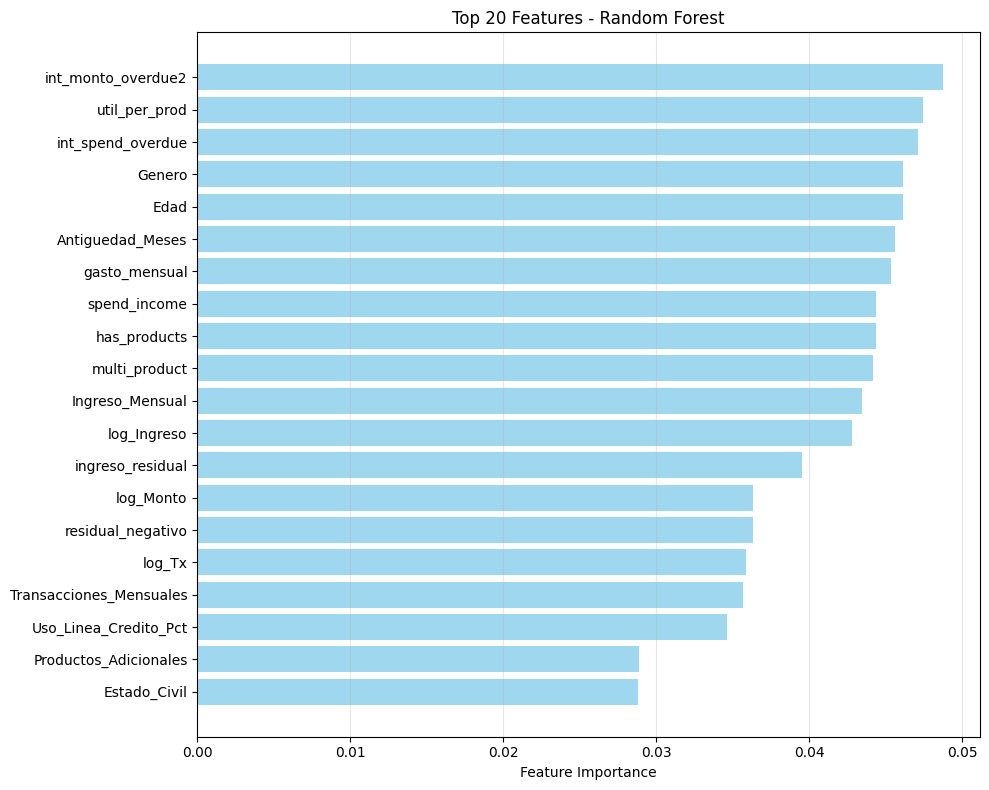


Importance Statistics:
  Total features: 46
  Top 5 cumulative importance: 0.2355
  Top 10 cumulative importance: 0.4593
  Top 20 cumulative importance: 0.8216

XGBoost:
----------------------------------------

Top 20 Most Important Features:


,Feature,Importance
11,log_Tx,0.038078
6,Uso_Linea_Credito_Pct,0.037538
34,flag_new_low_bundle,0.028056
35,flag_util_overdue,0.027801
44,risk_idx,0.027619
15,has_overdue,0.027037
26,tx_per_prod,0.027006
24,residual_negativo,0.026876
13,log_Tenure,0.026285
10,log_Ingreso,0.026211


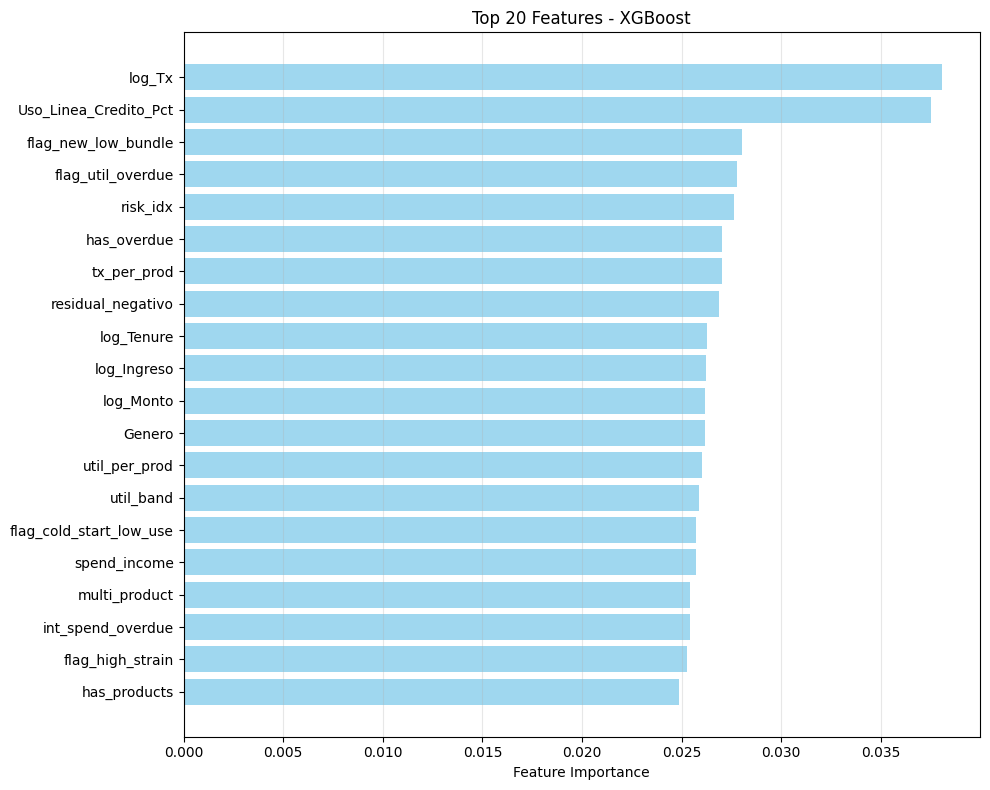


Importance Statistics:
  Total features: 46
  Top 5 cumulative importance: 0.1591
  Top 10 cumulative importance: 0.2925
  Top 20 cumulative importance: 0.5492

LightGBM:
----------------------------------------

Top 20 Most Important Features:


,Feature,Importance
1,Genero,221
40,int_monto_overdue2,185
23,ingreso_residual,180
0,Edad,176
20,gasto_mensual,164
19,multi_product,156
3,Ingreso_Mensual,156
24,residual_negativo,154
39,int_spend_overdue,148
6,Uso_Linea_Credito_Pct,143


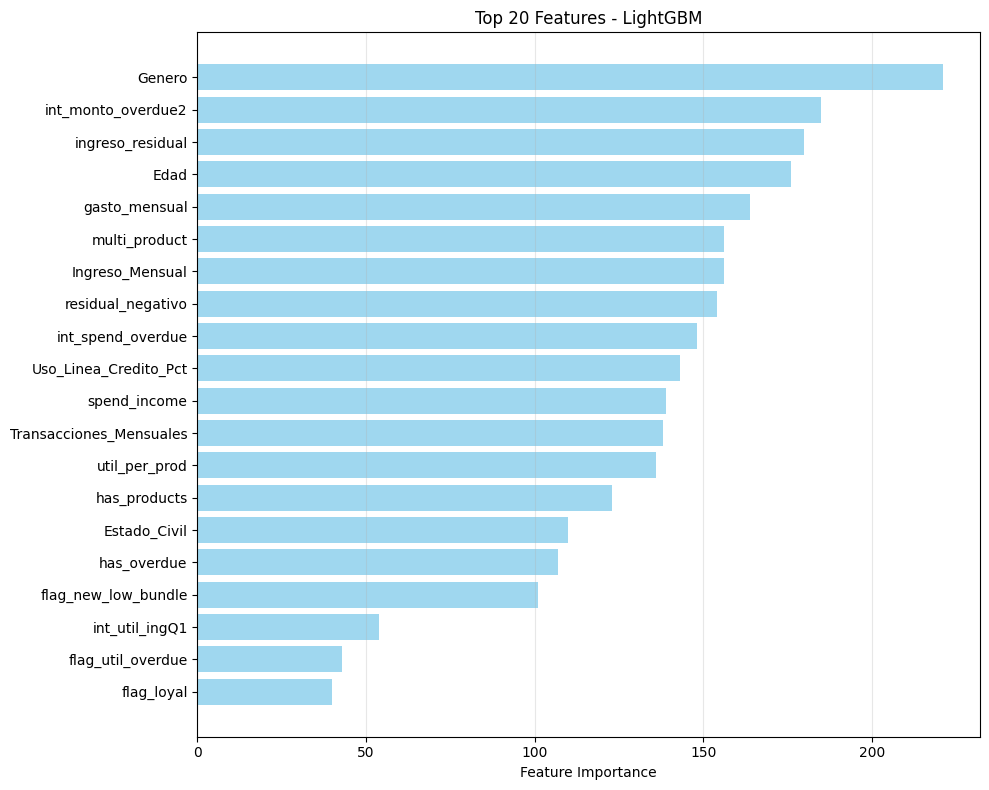


Importance Statistics:
  Total features: 46
  Top 5 cumulative importance: 926.0000
  Top 10 cumulative importance: 1683.0000
  Top 20 cumulative importance: 2674.0000

Gradient Boosting:
----------------------------------------

Top 20 Most Important Features:


,Feature,Importance
11,log_Tx,0.091296
25,util_per_prod,0.080728
1,Genero,0.076441
39,int_spend_overdue,0.068232
21,spend_income,0.063062
20,gasto_mensual,0.051083
8,Antiguedad_Meses,0.049195
40,int_monto_overdue2,0.049097
19,multi_product,0.048728
18,has_products,0.047872


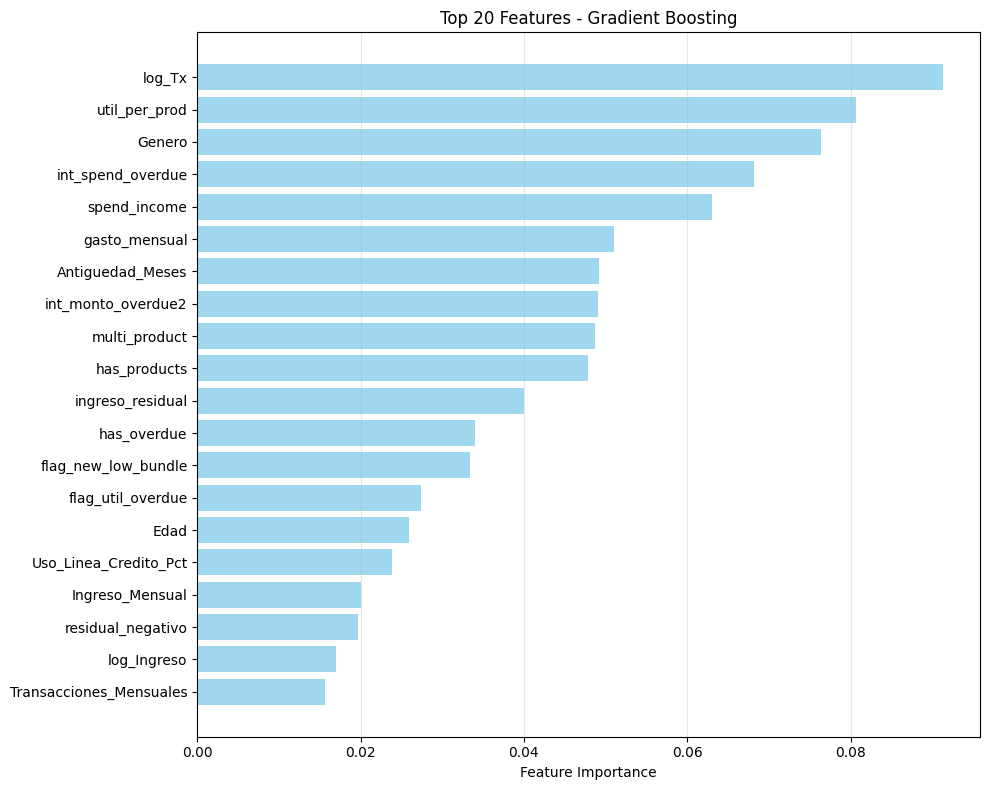


Importance Statistics:
  Total features: 46
  Top 5 cumulative importance: 0.3798
  Top 10 cumulative importance: 0.6257
  Top 20 cumulative importance: 0.8826


In [ ]:
import matplotlib.pyplot as plt

def get_feature_importance(pipeline, X_data, top_n=20):
    """
    Extract feature importance from a tree-based pipeline.
    
    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The fitted pipeline
    X_data : pd.DataFrame
        The data used to get feature names (use a reasonable sample, e.g., X_tr.head(100))
    top_n : int
        Number of top features to return
    """
    # Get the classifier from pipeline
    clf = pipeline.named_steps['clf']
    
    # Get feature names after preprocessing
    try:
        # Transform a larger sample to avoid binning issues (use at least 100 rows)
        X_sample = X_data.head(min(100, len(X_data)))
        feat_step = pipeline.named_steps['feat']
        
        # Transform through feature engineering
        X_transformed = feat_step.transform(X_sample)
        
        # Get feature names (columns after feature engineering)
        if isinstance(X_transformed, pd.DataFrame):
            feature_names = X_transformed.columns.tolist()
        else:
            # If it's a numpy array, we need to get names differently
            feature_names = [f"feature_{i}" for i in range(X_transformed.shape[1])]
        
        # Get importance
        if hasattr(clf, 'feature_importances_'):
            importances = clf.feature_importances_
        else:
            print("Model doesn't have feature_importances_ attribute")
            return None
        
        # Check if dimensions match
        if len(feature_names) != len(importances):
            print(f"Warning: Feature names ({len(feature_names)}) don't match importances ({len(importances)})")
            print("Using generic feature names instead")
            feature_names = [f"feature_{i}" for i in range(len(importances))]
        
        # Create DataFrame
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        return importance_df
        
    except Exception as e:
        print(f"Error extracting feature importance: {e}")
        import traceback
        traceback.print_exc()
        return None


# Extract feature importance for each model
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

feature_importances = {}

for model_name, result in results.items():
    print(f"\n{model_name}:")
    print("-" * 40)
    
    # Pass X_tr to the function so it can use a proper sample
    importance_df = get_feature_importance(result['pipeline'], X_tr, top_n=20)
    
    if importance_df is not None:
        feature_importances[model_name] = importance_df
        
        print(f"\nTop 20 Most Important Features:")
        display(importance_df.head(20))
        
        # Plot
        plt.figure(figsize=(10, 8))
        top_features = importance_df.head(20)
        plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue', alpha=0.8)
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 20 Features - {model_name}')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\nImportance Statistics:")
        print(f"  Total features: {len(importance_df)}")
        print(f"  Top 5 cumulative importance: {importance_df.head(5)['Importance'].sum():.4f}")
        print(f"  Top 10 cumulative importance: {importance_df.head(10)['Importance'].sum():.4f}")
        print(f"  Top 20 cumulative importance: {importance_df.head(20)['Importance'].sum():.4f}")